# How to FFT and not suck at it
<img src="files/Joseph_Fast_Fourier.jpg" width="300"/>

> The most important numerical algorithm of our lifetime.
>
> -- <cite>Gilbert Strang</cite>

# First, how to python:
- Install python. I prefer to use anaconda: [Anaconda](https://www.anaconda.com/distribution/). If you need help installing, just talk to me.
- I like prototyping and hacking at data in Jupyter notebooks. Read more at [Jupyter](https://jupyter.org/)
- If you get confused about packages, read the docs: [documentation](https://scipy.org/)
- If you are a former matlab user, check this cheat sheet out: [Numpy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html)

In [1]:
%matplotlib notebook
import numpy as np
import scipy.fftpack as fft
import matplotlib.pyplot as plt
print("Now you can python") 

Now you can python


# How to FFT
First and easiest thing to consider: how to correctly take an FFT, normalize it, and plot it correctly. First, a couple important things...

## The Fourier Transform
The Fourier transform is defined as:

&nbsp;&nbsp;&nbsp;&nbsp;$X(f) = \int_{-\infty}^{\infty}x(t)e^{-2\pi i f t}dt$

And, it inverse is

&nbsp;&nbsp;&nbsp;&nbsp;$x(t) = \int_{-\infty}^{\infty}X(f)e^{-2\pi i f t}df$

Unless you have fancy mathematical software (or use python's symbolic library), computer don't typically perform continuous integrals. So, we have to do this digitally. Also, this is just one convention of how to define the FT. ** There is no standard convention **, so whatever you are using, be careful pay attention to what it does. For example, in physics, the most common convention is

&nbsp;&nbsp;&nbsp;&nbsp;$X(f) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}x(t)e^{i \omega t}dt$

And, it inverse is

&nbsp;&nbsp;&nbsp;&nbsp;$x(t) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}X(f)e^ {-i \omega t}df$

But, all the signs, factors of $\pi$ can be permuted. 

## The Discrete Fourier Transform (colloquially, the FFT)

First, nomenclature. The digital version of a Fourier transform is called a discrete Fourier transform (DFT) since it is performed on discrete samples. From the simple definition below, the DFT computation is typically $O(n^2)$ for computational cost. However, do to the Fast Fourier transform (FFT) algorithms developed, this drops to $O(n\,log(n))$. This is huge, the plot below explaines why. 





<IPython.core.display.Javascript object>


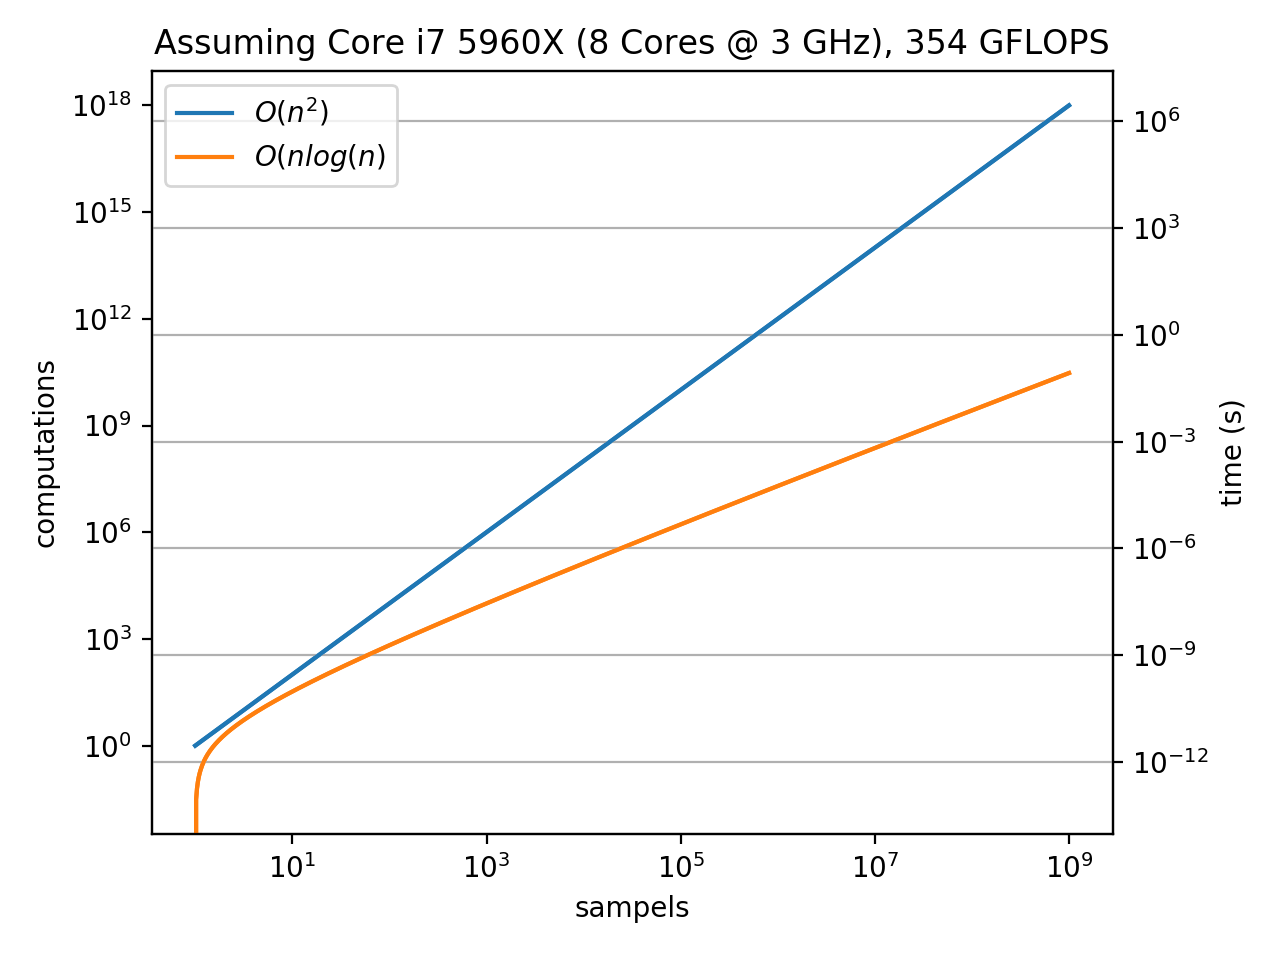

In [2]:
n = np.logspace(0,9,1000)

_, ax = plt.subplots()
ax.loglog(n,n**2, label = r"$O(n^2)$")
ax.loglog(n,n*np.log2(n), label = r"$O(n log(n)$")
ax.set_xlabel("sampels")
ax.set_ylabel("computations")

ax2 = ax.twinx()
ax2.set_title("Assuming Core i7 5960X (8 Cores @ 3 GHz), 354 GFLOPS")
ax2.loglog(n,n**2 / 354e9, label = r"$O(n^2)$")
ax2.loglog(n,n*np.log2(n) / 354e9, label = r"$O(n log(n)$")
ax2.set_ylabel("time (s)")
ax2.grid()

plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


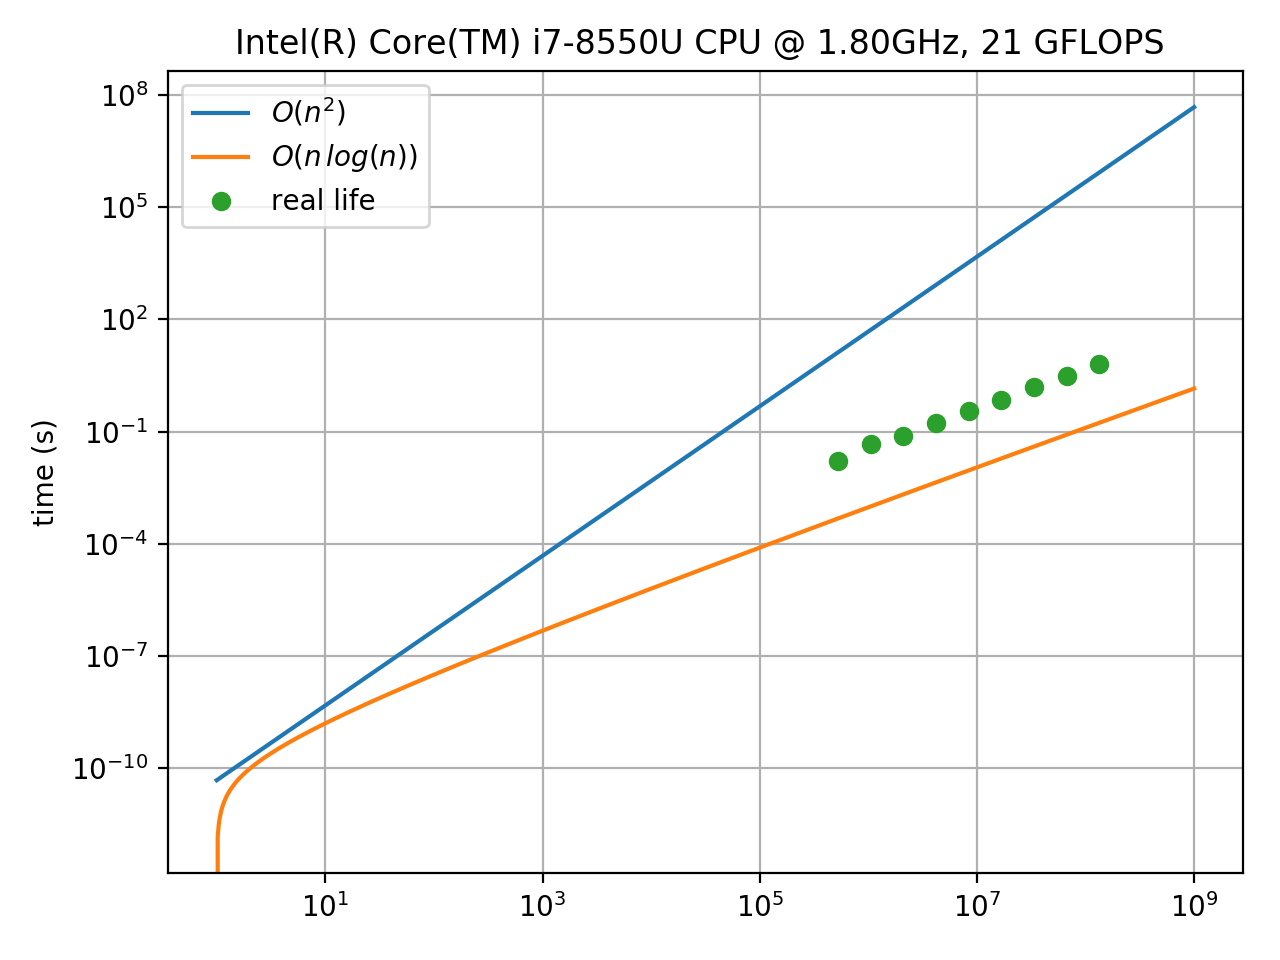

In [3]:
import time
ps = [18,28]
pows = np.arange(ps[0],ps[1],1)
maxpow = pows[-1]
times = np.zeros(ps[1]-ps[0])
n_s = np.zeros(ps[1]-ps[0])
x = np.arange(2**maxpow)
for i,p in enumerate(pows):
    n_s[i] = 2**p
    t_start = time.time()
    fft.fft(x[:2**p])
    times[i] = (time.time() - t_start) 
    
_, ax = plt.subplots()
GFLOPS = 21
ax.set_title(f"Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, {GFLOPS} GFLOPS ")
ax.loglog(n,n**2 / GFLOPS/1e9, label = r"$O(n^2)$")
ax.loglog(n,n*np.log2(n) / GFLOPS/1e9, label = r"$O(n\,log(n))$")
ax.plot(n_s, times, 'o',label= "real life")

ax.set_ylabel("time (s)")
ax.grid()

plt.legend()
plt.tight_layout()
plt.show()

## Definitions
For most python librarys, the FFT is defined as:

&nbsp;&nbsp;&nbsp;&nbsp;$X = FFT\{x\}$

&nbsp;&nbsp;&nbsp;&nbsp;$X_k = \sum_{n=0}^{N-1} x_n\cdot e^{\frac{- i 2 \pi}{N}kn}$

And, the inverse FFT as:

&nbsp;&nbsp;&nbsp;&nbsp;$x = iFFT\{X\}$

&nbsp;&nbsp;&nbsp;&nbsp;$x_n = \frac{1}{N} \sum_{n=0}^{N-1} X_k\cdot e^{\frac{ i 2 \pi}{N}kn}$

**The default normalization has the direct transforms unscaled and the inverse transforms are scaled by $1/n$. It is possible to obtain unitary transforms by setting the keyword argument norm to "ortho" (default is None) so that both direct and inverse transforms will be scaled by $1/\sqrt{n}$.**

It is also important to notice that there is a factor of $2\pi$ in the exponent for both the $FFT$ and the $iFFT$. So, when using it, you will generall y need to be using angular units for everything. Most of us think in Hertz. So, a frequency $f$ in Hertz is translated to angular units using the relations

&nbsp;&nbsp;&nbsp;&nbsp; $\omega = 2 \pi f$, 

where $\omega$ is angular frequency (radians/second) instead of Hertz (cycles/second).

<IPython.core.display.Javascript object>


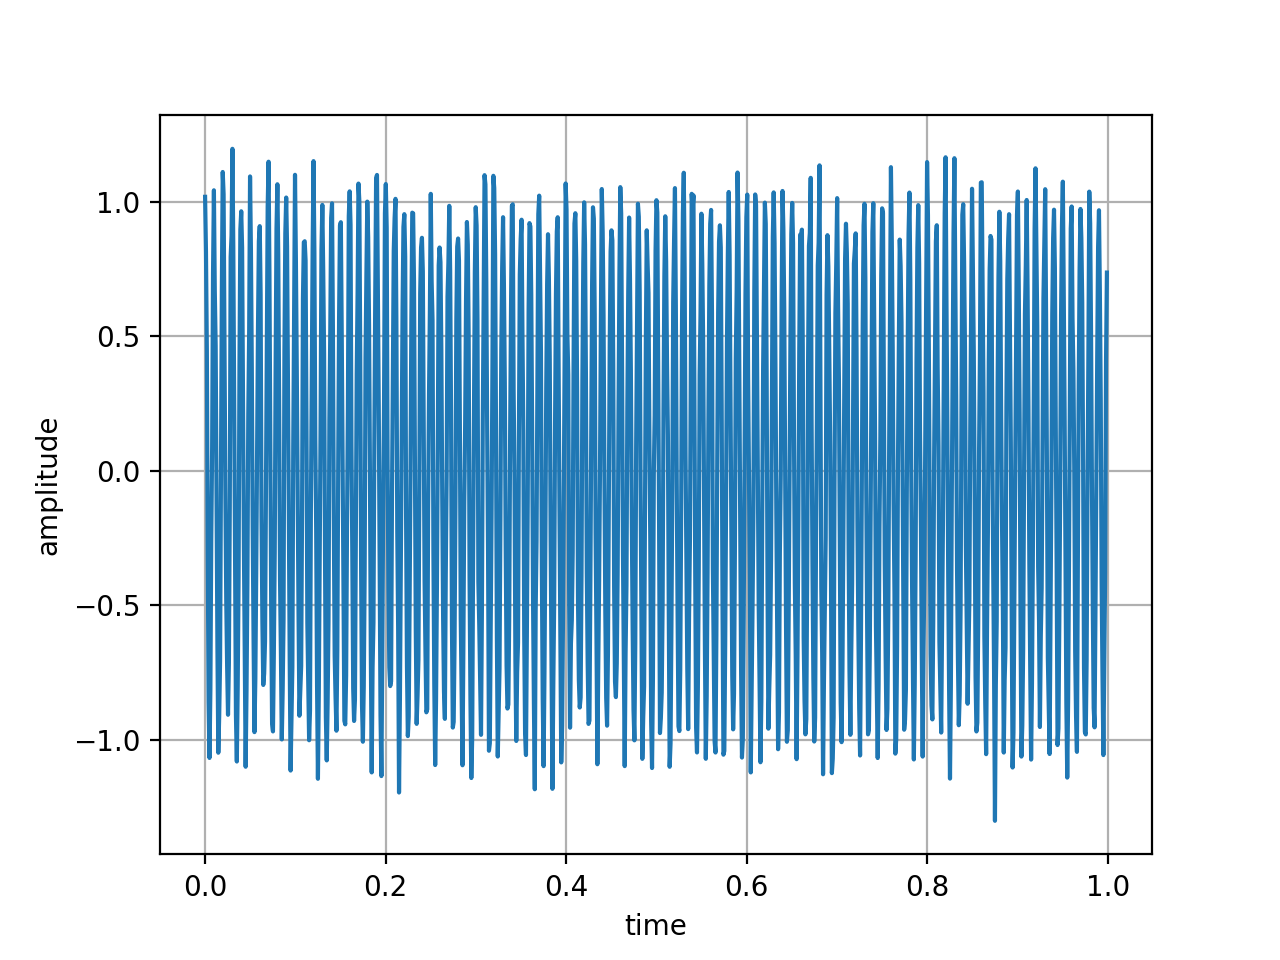

<IPython.core.display.Javascript object>


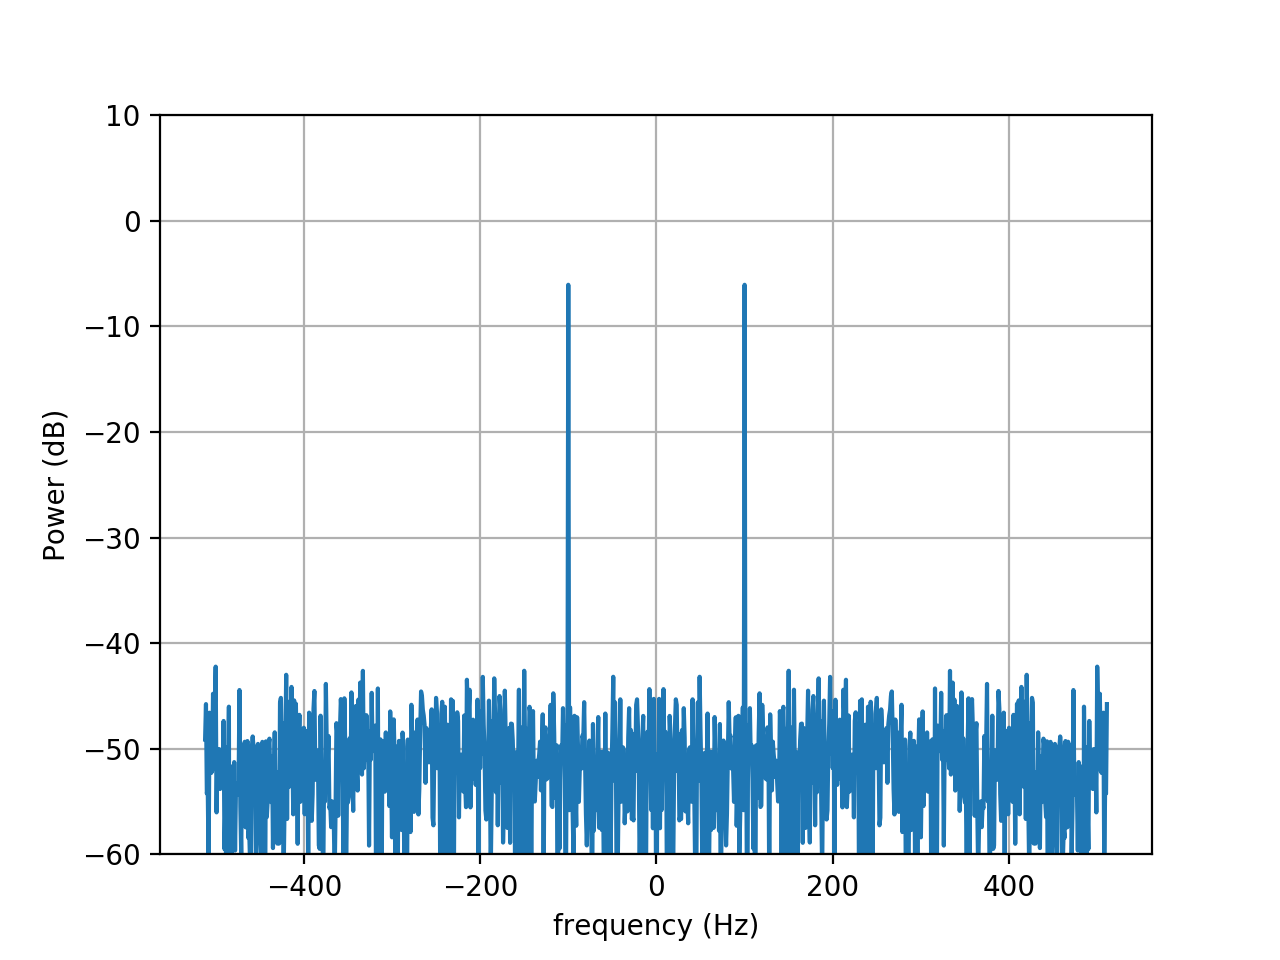

<IPython.core.display.Javascript object>


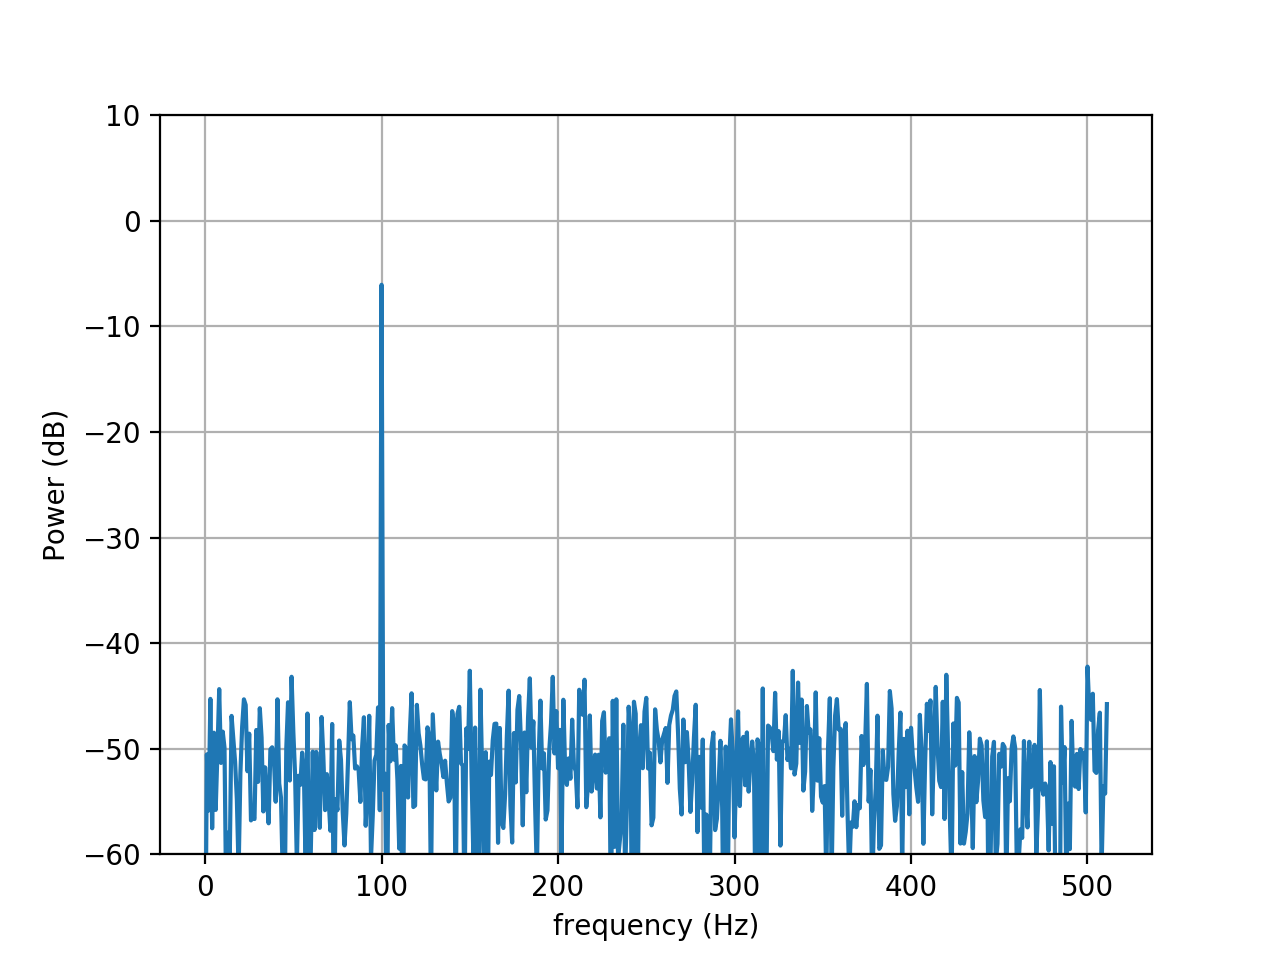

In [4]:
def noise(s,N , off = 0):
    return np.random.normal(loc=off, scale=s, size=N)

def example():
    N = 2 ** 10
    t = np.arange(0,1,1/N)
    dt = t[1] - t[0]
    omega = 2 * np.pi * 100
    y = np.cos(omega * t)



    
    y += noise(.1,N)

    plt.figure()
    plt.plot(t,y.real)
    plt.ylabel("amplitude")
    plt.xlabel("time")
    plt.grid()
    plt.show()
    
    
    s = fft.fftshift( fft.fft(y,N) / N ) # divide by N to normalize! see documentation. 
    S = np.abs(s) ** 2 
    freq = fft.fftshift( fft.fftfreq(N, dt) ) # I'll explain the fft.fftshift later...
    PSD = 20 * np.log10(np.abs(s))

    plt.figure()
    plt.plot(freq, PSD)
    plt.xlabel("frequency (Hz)")
    plt.ylabel("Power (dB)")
    plt.ylim(-60,10)
    plt.grid()
    
    plt.figure()
    plt.plot(freq[N//2:], PSD[N//2:])
    plt.xlabel("frequency (Hz)")
    plt.ylabel("Power (dB)")
    plt.ylim(-60,10)
    plt.grid()
    
    plt.show()
    return N, dt, freq

N, dt, freq = example()

# Sampling rate, sampling time, resolution
Let's consider how sample time, sample rate, and resolution are all related.

In this example, the sample rate was $1/dt = 1024$ kHz. Our sample time was 1 second. Therefore, the maximum resolvable frequency is determined by the Nyquist limit. In this cas $1/(2dt) = 512$ Hz. Because we sampled for 1 second, the frequency resolution should be 1 Hz. This is also typically referred to as resolution bandwidth. We can check all this numerically.

In [5]:
print(f"The number of samples was {N}")
print(f"The maximum frequency determined by Nyquist is {1/dt/2}")
print(f"The resolution bandwidth is {freq[1]-freq[0]} Hz")

The number of samples was 1024
The maximum frequency determined by Nyquist is 512.0
The resolution bandwidth is 1.0 Hz


# What's with the negative frequencies?
## sin${(\omega t)}$, cos${(\omega t)}$, and $e^{i\omega t}$

Remember that

&nbsp;&nbsp;&nbsp;&nbsp;$e^{i \omega t} = $ cos${(\omega t)} + j$ sin${(\omega t)}$

Of course you do...

This also means that

&nbsp;&nbsp;&nbsp;&nbsp;cos${(\omega t)} = \frac{1}{2} (e^{i \omega t} + e^{-i \omega t})$

So, trig functions are complex. Thus, negative frequencies are possible. In nature, there are no "negative" frequencies. However, there are situations where a phasor ( that is, something like $e^{i \omega t}$) can "spin" clockwise or counter clockwise relative to another phasor at a different frequency. This will be important when we discuss digitizers and I/Q sampling.

For now, I can show you how you can see the difference between a positive and negative frequency...But first, I'll write a general FFT function so I can save some typing.

<IPython.core.display.Javascript object>


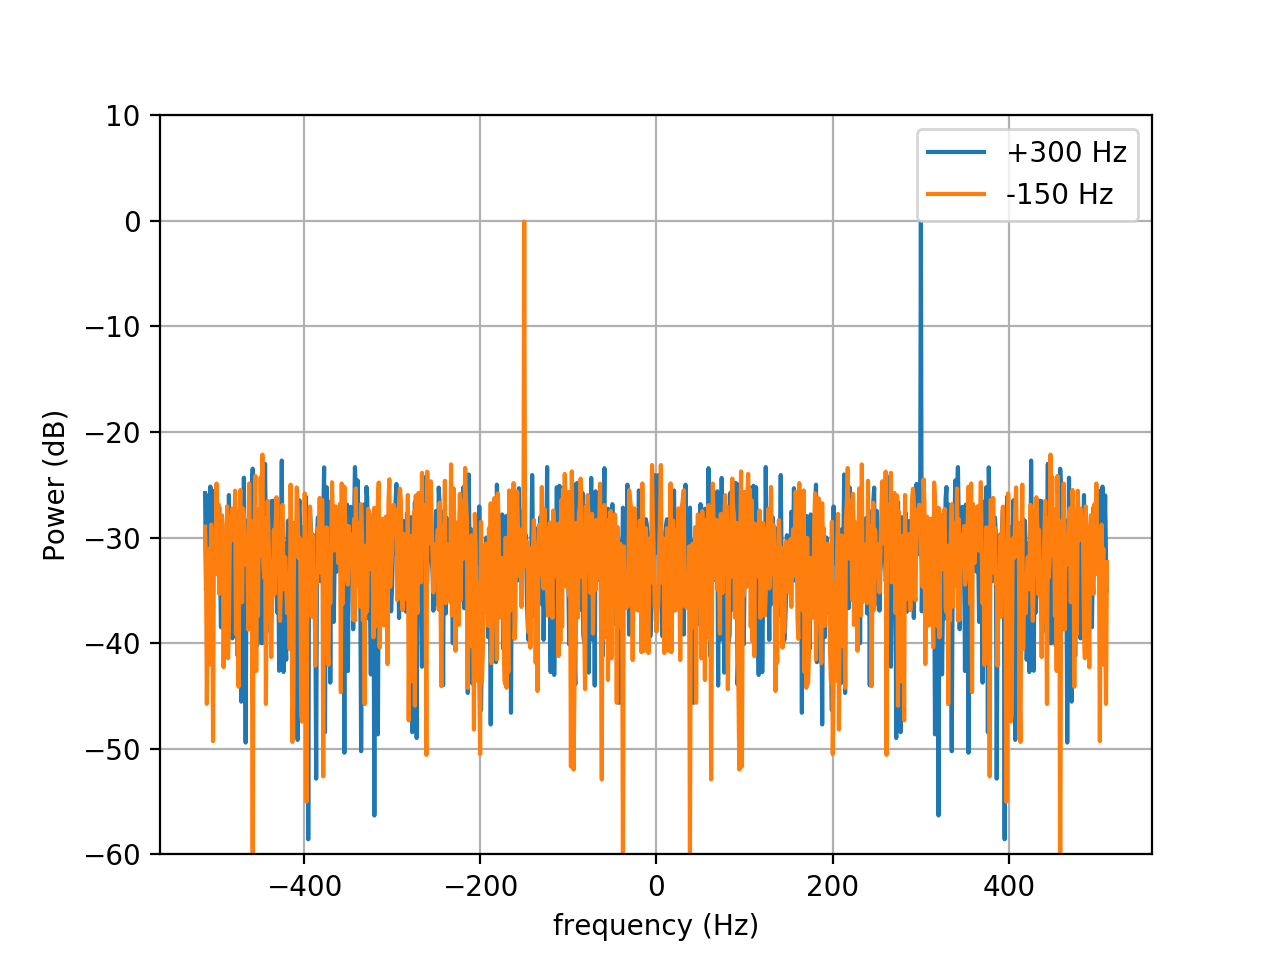

In [6]:
# make a simple FFT function
def FFT(t , y, N = 0):
    '''
    when you write a function put comments here. 
    call:
        FFT(t , y, N = 0)
    input:
        t: time array
        y: amplitude array with len(y) == len(t)
        N: FFT length, default is len(y)
    returns:
        freq: Fourier frequencies
        s: FFT amplitudes
        S: FFT Powers (linear)
        PSD: FFT powers (dB)
    '''
    if N == 0:
        N = len(y)
    
    dt = t[1] - t[0]
    s = fft.fftshift( fft.fft(y,N) / len(t) ) # divide by N to normalize! see documentation. 
    S = np.abs(s) ** 2 
    freq = fft.fftshift( fft.fftfreq(N, dt) ) # I'll explain the fft.fftshift later...
    PSD = 20 * np.log10(np.abs(s))
    return freq, s, S, PSD

# show a couple different signals
t = np.arange(0,1,1/2**10)
y1 = np.exp(2j * np.pi *  300* t) + noise(1, 2 ** 10)
y2 = np.exp(-2j * np.pi * 150 * t) + noise(1, 2 ** 10)

freq1, s1, S1, PSD1 = FFT(t, y1)
freq2, s2, S2, PSD2 = FFT(t, y2)

#plot them
plt.figure()
plt.plot(freq1, PSD1, label = "+300 Hz")
plt.plot(freq2, PSD2, label = "-150 Hz")
plt.xlabel("frequency (Hz)")
plt.ylabel("Power (dB)")
plt.ylim(-60,10)
plt.legend()
plt.grid()
plt.show()

In [7]:
FFT??

# Getting the units correct
### Label your axes or I won't take you seriously. Seriously.
<img src="files/XKCD.png" width="800"/>

[and if you labeled your axes, I could tell you exactly how much](https://xkcd.com/833/)
### Normalization
As I previously discussed, it is important to read the documentation of the FFT you are using because there is no standard way to normalize them. This is important because, if you care about your data, then you definitely care about the y-axis when you plot it. So, getting that correct is super important.

Since we work in the RF world, I will show you how to get the y-axis correct. Let's assume we have a 1 Volt peak sine wave. Let's see if I can plot it correctly and get the correct power reading for various sampling times. The amount of sampling time should **NOT** change the power reading. 


<IPython.core.display.Javascript object>


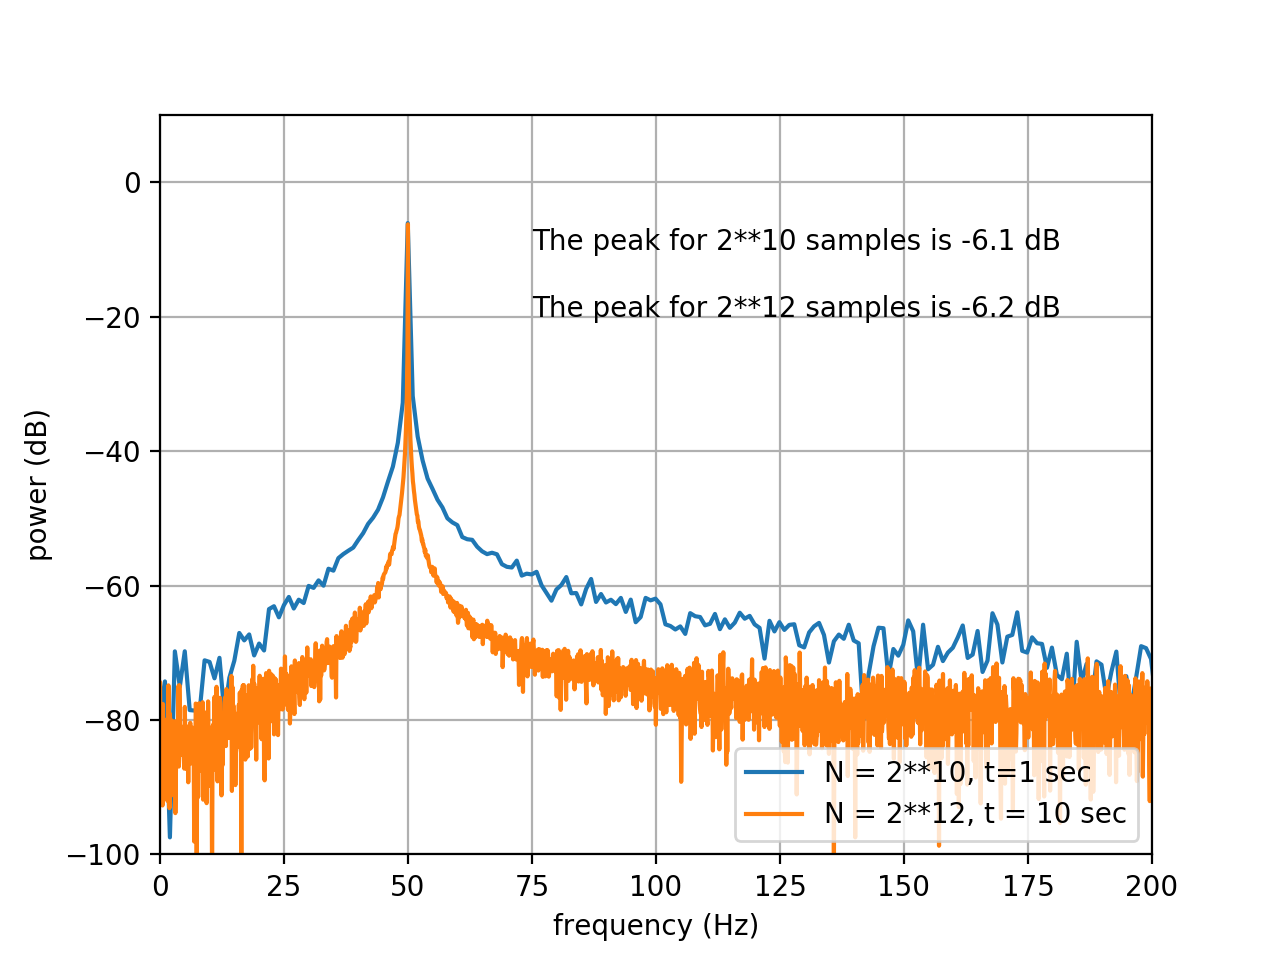

In [8]:
def wave(f, tmax, N = 2**10):
    t = np.linspace(0,tmax,N)
    omega = 2 * np.pi * f
    return t, np.sin(omega * t) 

t1, y1 = wave(50,1, N=2**10)
t2, y2 = wave(50,10, N=2**12)

freq1, s1, S1, PSD1 = FFT(t1, y1+noise(.005, len(y1)))
freq2, s2, S2, PSD2 = FFT(t2, y2+noise(.005, len(y2)))

plt.figure()
plt.plot(freq1, 10*np.log10(S1), label = "N = 2**10, t=1 sec") 
plt.plot(freq2, 10*np.log10(S2), label = "N = 2**12, t = 10 sec")
plt.ylim(-100,10)
plt.xlim(0,200)
plt.xlabel("frequency (Hz)")
plt.ylabel("power (dB)")
plt.text(75,-10, f"The peak for 2**10 samples is {np.round(max(10*np.log10(S1)),1)} dB")
plt.text(75,-20, f"The peak for 2**12 samples is {np.round(max(10*np.log10(S2)),1)} dB")
plt.legend(loc = "lower right")
plt.grid()
plt.show()

OK, but so far, I have only converted the power to dB. I don't have any real units yet.

So, since we usually use dBm, I'll show you how to conver to that...

dBm is a power scale referenced so that 1 mW = 0 dBm. For RF systems, the power is measured by $ Power =  \frac{V_{rms}^2}{R}$, or in units of mW $ Power [mW] = 1\times10^{3}  \frac{V_{rms}^2}{R}$.

So, now for some useful relations:

&nbsp;&nbsp;&nbsp;&nbsp;$V_{rms} = \frac{|V_{p}|}{\sqrt(2)}$

&nbsp;&nbsp;&nbsp;&nbsp;$dBm \rightarrow 10\cdot log_{10}\left(  \frac{V_{rms}^2 10^3}{50}  \right) $

Also, remember that the $|a|^2\propto$ power where $a$ are our FFT amplitudes (the outputs of the FFT). So we just need to factor that in. We just need to convert to RMS. Also, rememberthat $a$ is an amplitude, not a peak-peak value. 

For the PSD that is calculated in the FFT function I previously defined, I just need to scale it by $10\cdot log_{10}\left( \frac{1000}{2\times50}\right) = 10$

<IPython.core.display.Javascript object>


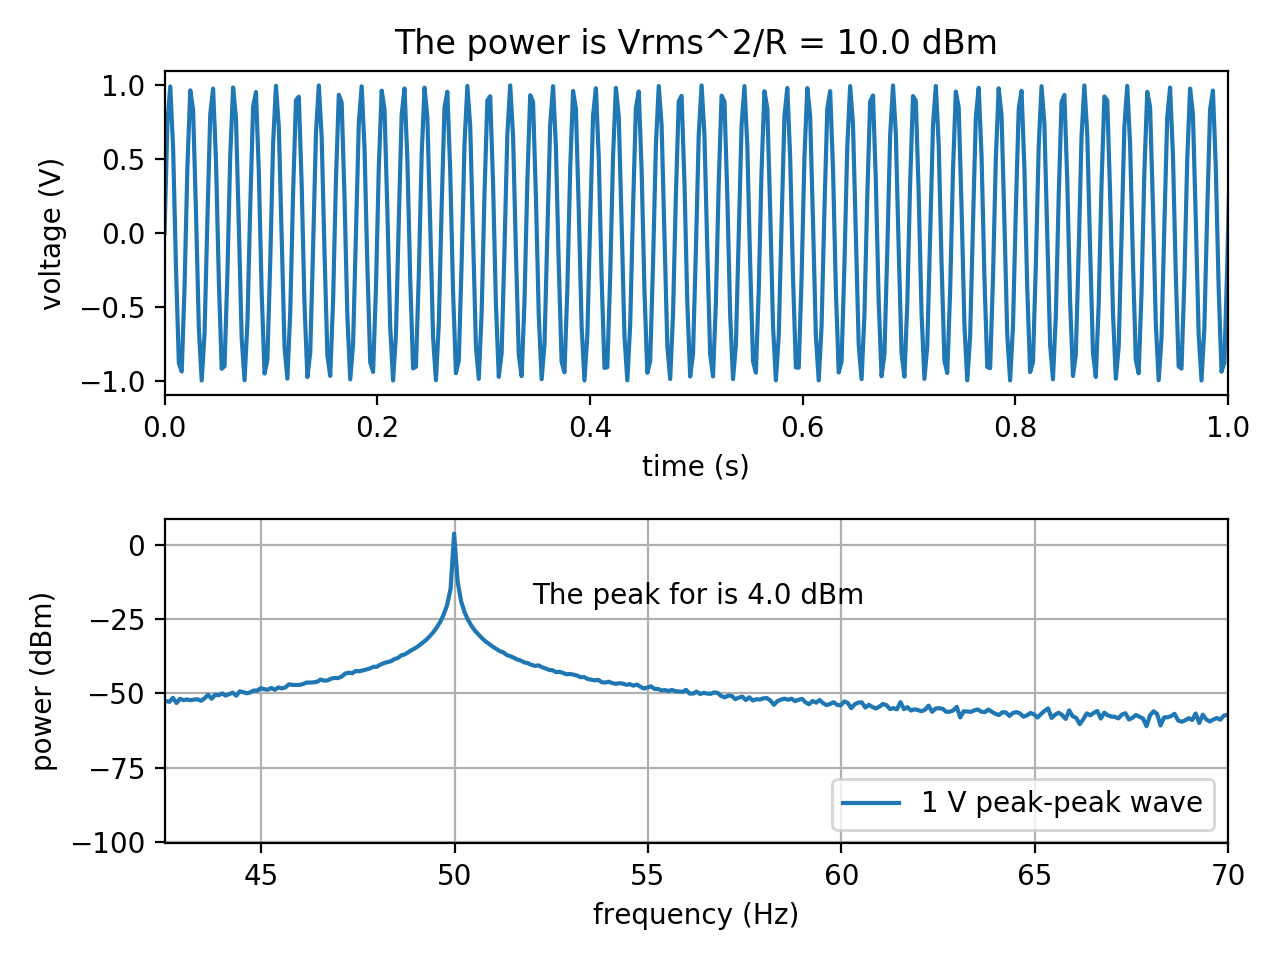

In [9]:
# make a wave
t1, y1 = wave(50,11, N=2**12)
# FFT it
freq1, s1, S1, PSD1 = FFT(t1, y1+noise(.005, len(y1)))
# calc rms value of time domain signal
Vrms = np.sqrt(np.mean(np.abs(y1)**2))

def dBm(x):
    '''
    takes the FFT PSD and converts to dBm.
    '''
    return 10 + x

# plot stuff
_, ax = plt.subplots(2)
# time domain
ax[0].set_title(f"The power is Vrms^2/R = {np.round(30+10*np.log10(Vrms**2/50),1)} dBm")
ax[0].plot(t1, y1)
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("voltage (V)")
ax[0].set_xlim(0,1)
#frequency domain
ax[1].plot(freq1, dBm(PSD1), label = "1 V peak-peak wave")
ax[1].set_xlim(42.5,70)
ax[1].set_xlabel("frequency (Hz)")
ax[1].set_ylabel("power (dBm)")

plt.text(52,-20, f"The peak for is {np.round(max(dBm(PSD1)),0)} dBm")
plt.legend(loc = "lower right")
plt.grid()
plt.tight_layout()
plt.show()

# What?! Off by 6 dB. 

The reason for this is because we decided to normalize the FFT with a 1/N scaling. Why? This is because we chose that the function $ e^{i\omega t}$ should normalize to one in the integral. Don't believe me? Go to wikipedia and look up the [Dirac Delta function](https://en.wikipedia.org/wiki/Dirac_delta_function#Fourier_transform) with regards to FFTs. It's also the normalization scheme that satisfies Parseval's theorem (more on that below). 

So, how do we deal with this? One of two ways. You can remember there is a factor of 2 floating around (in amplitude) when taking FFTs of real functions (and not complex I/Q data), or emperically determine how to normalize. IE, FFT something with a known answer and check that against the output. Scale appropriately. 

Not satisfied? The reason for the factor of 2 is because how the FFT works and how we defined our input. Remember that:  $a\,cos{(\omega t)} = \frac{a}{2} (e^{i \omega t} + e^{-i \omega t})$. So, a cosine is made up of a negative and positive phasor. If we want to accurately recover a, we need to measure the power in the positive and negative rotating phasor. Above, I only plotted the positive frequency compenents. If I repeat the process above and show the full FFT output, the factor of 2 in amplitude (or 6 dB in power missing) is easily explained. 

If you still don't believe me, I'll plot a sin and an exp on the same chart and you'll see the amplitude difference.

<IPython.core.display.Javascript object>


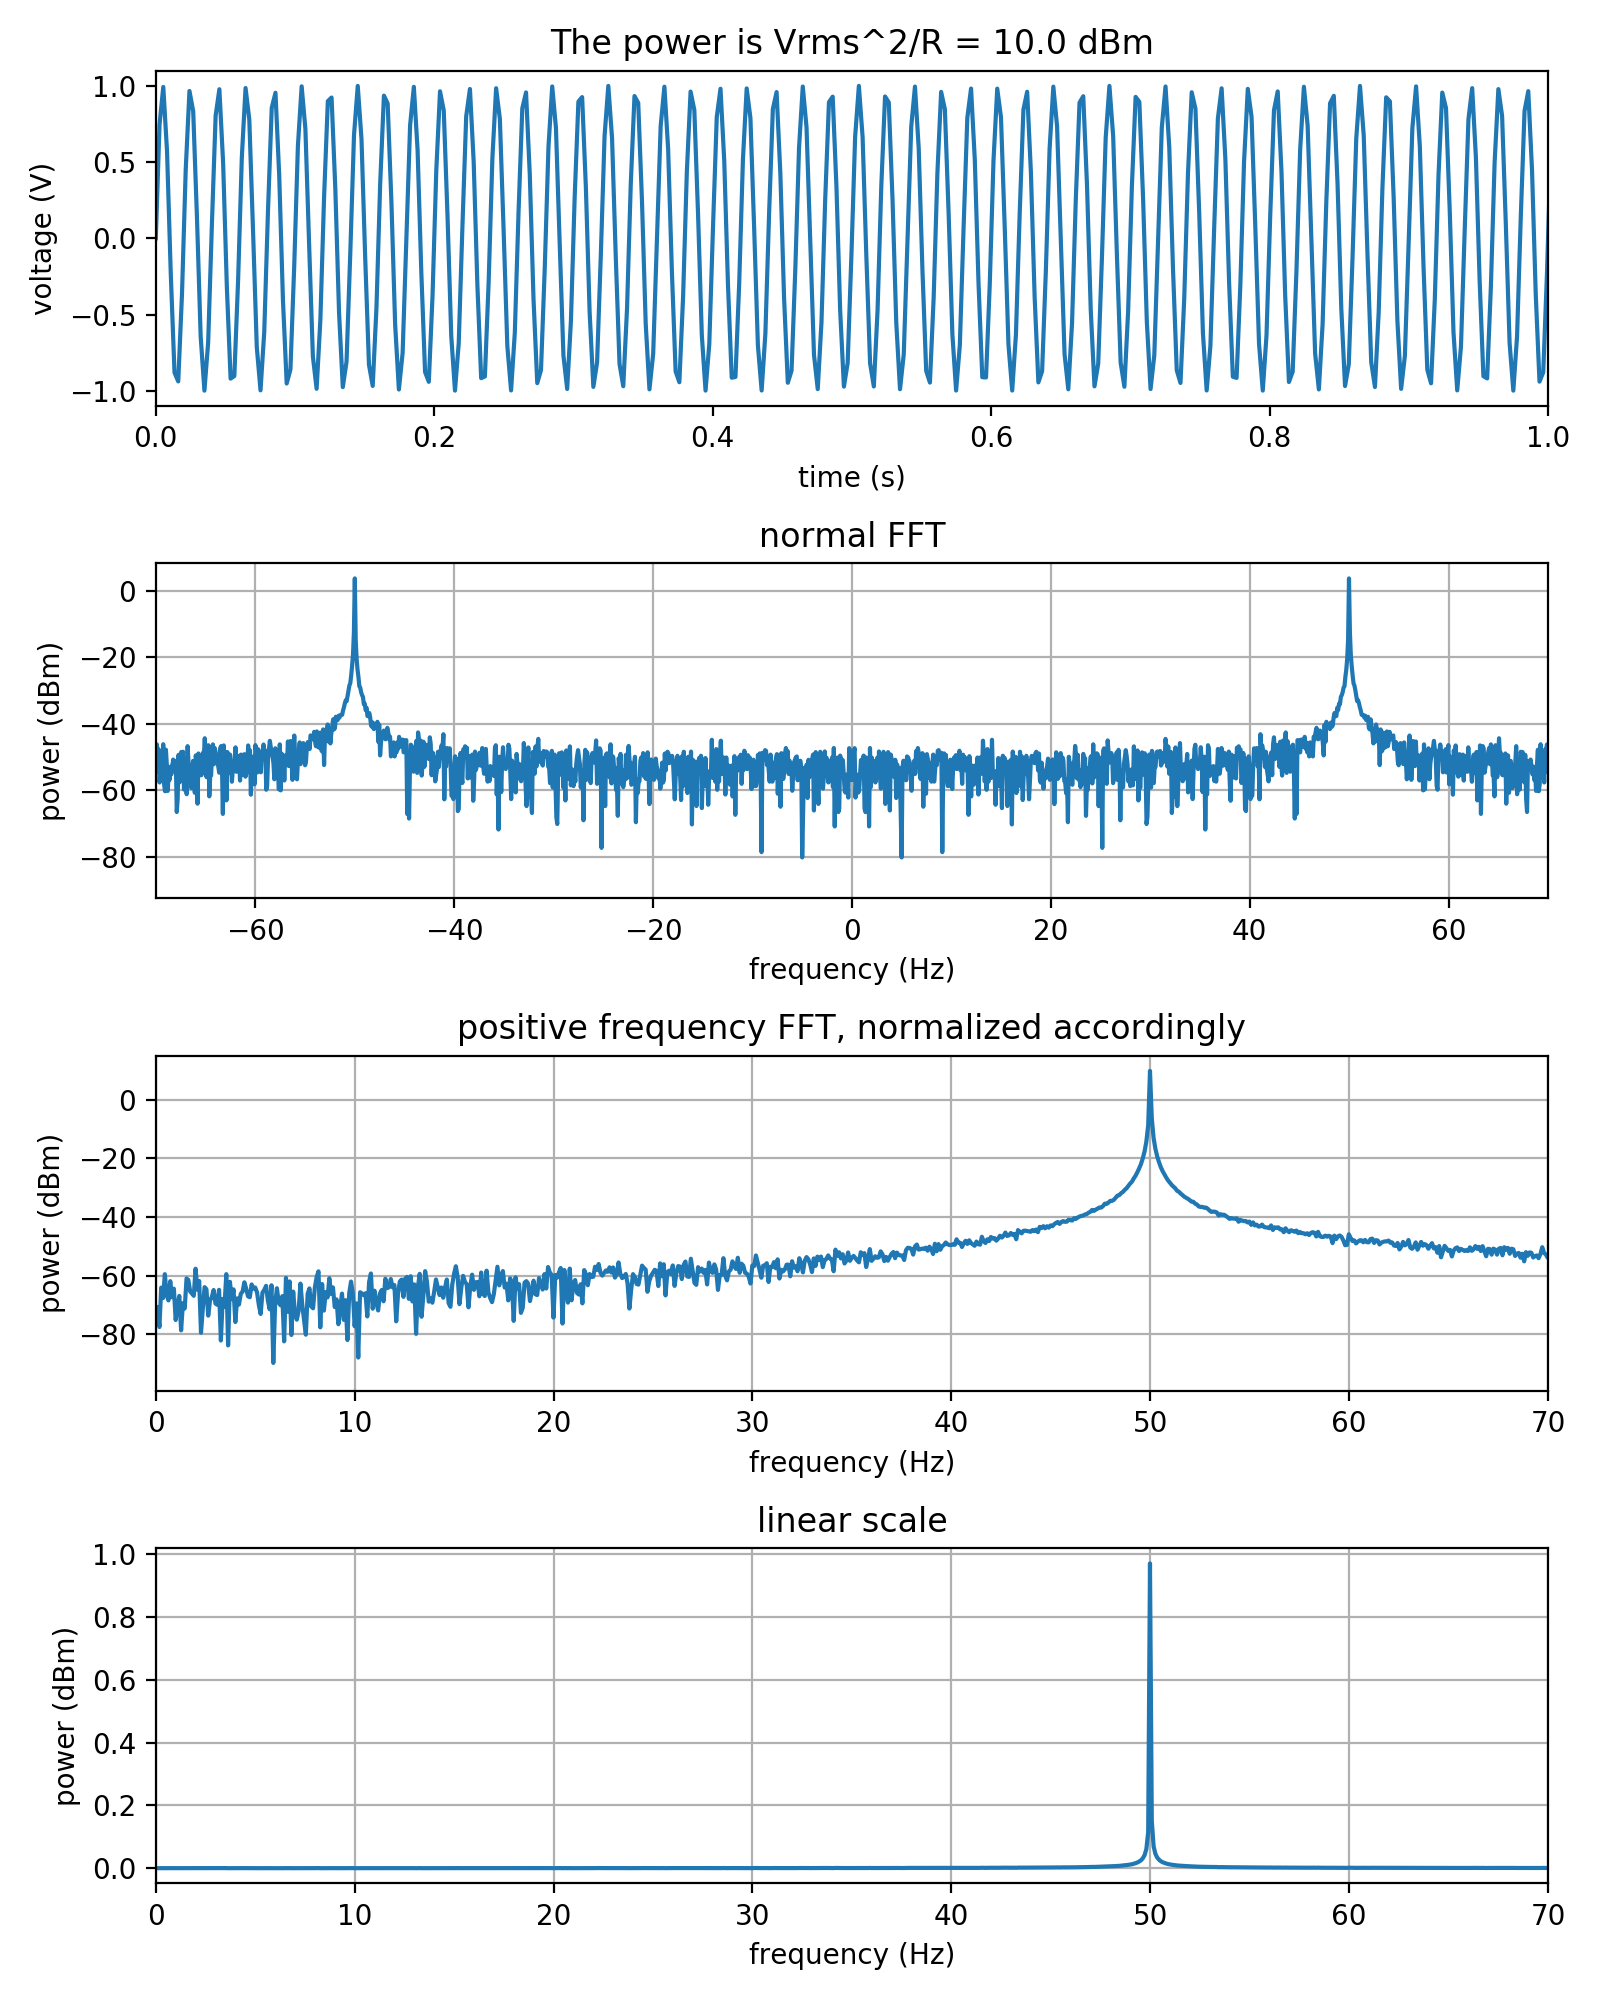

In [10]:
t1, y1 = wave(50,11, N=2**12)

freq1, s1, S1, PSD1 = FFT(t1, y1+noise(.05, len(y1)))
Vrms = np.sqrt(np.mean(np.abs(y1)**2))


def rFFT(t , y, N = 0):
    '''
    when you write a function put comments here. 
    
    input:
        t: time array
        y: amplitude array with len(y) == len(t)
        N: FFT length, default is len(y)
    returns:
        freq: Fourier frequencies
        s: FFT amplitudes
        S: FFT Powers (linear)
        PSD: FFT powers (dB)
    '''
    if N == 0:
        N = len(y)
    
    dt = t[1] - t[0]
    s =  fft.fftshift(fft.fft(y,N) * 2 / len(t))  # divide by N to normalize! see documentation. 
    S = np.abs(s) ** 2  
    freq = fft.fftshift(fft.fftfreq(N, dt))  # I'll explain the fft.fftshift later...
    PSD = 20 * np.log10(np.abs(s))
    return freq[N//2:], s[N//2:], S[N//2:], PSD[N//2:]

freq2, s2, S2, PSD2 = rFFT(t1, y1+noise(.005, len(y1)))

_, ax = plt.subplots(4, figsize=(8,10))
ax[0].set_title(f"The power is Vrms^2/R = {np.round(30+10*np.log10(Vrms**2/50),1)} dBm")
ax[0].plot(t1, y1)
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("voltage (V)")
ax[0].set_xlim(0,1)

ax[1].plot(freq1, dBm(PSD1), label = "1 V peak-peak wave")
ax[1].set_xlim(-70,70)
ax[1].set_xlabel("frequency (Hz)")
ax[1].set_ylabel("power (dBm)")
ax[1].set_title("normal FFT")
ax[1].grid()

ax[2].plot(freq2, dBm(PSD2), label = "1 V peak-peak wave")
plt.text(20,-20, f"The peak for is {np.round(max(dBm(PSD2)),0)} dBm")
ax[2].set_xlim(0,70)
ax[2].set_xlabel("frequency (Hz)")
ax[2].set_ylabel("power (dBm)")
ax[2].set_title("positive frequency FFT, normalized accordingly")
ax[2].grid()


ax[3].plot(freq2, np.abs(s2), label = "1 V peak-peak wave")
ax[3].set_xlim(0,70)
ax[3].set_xlabel("frequency (Hz)")
ax[3].set_ylabel("power (dBm)")
ax[3].set_title("linear scale")
ax[3].grid()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


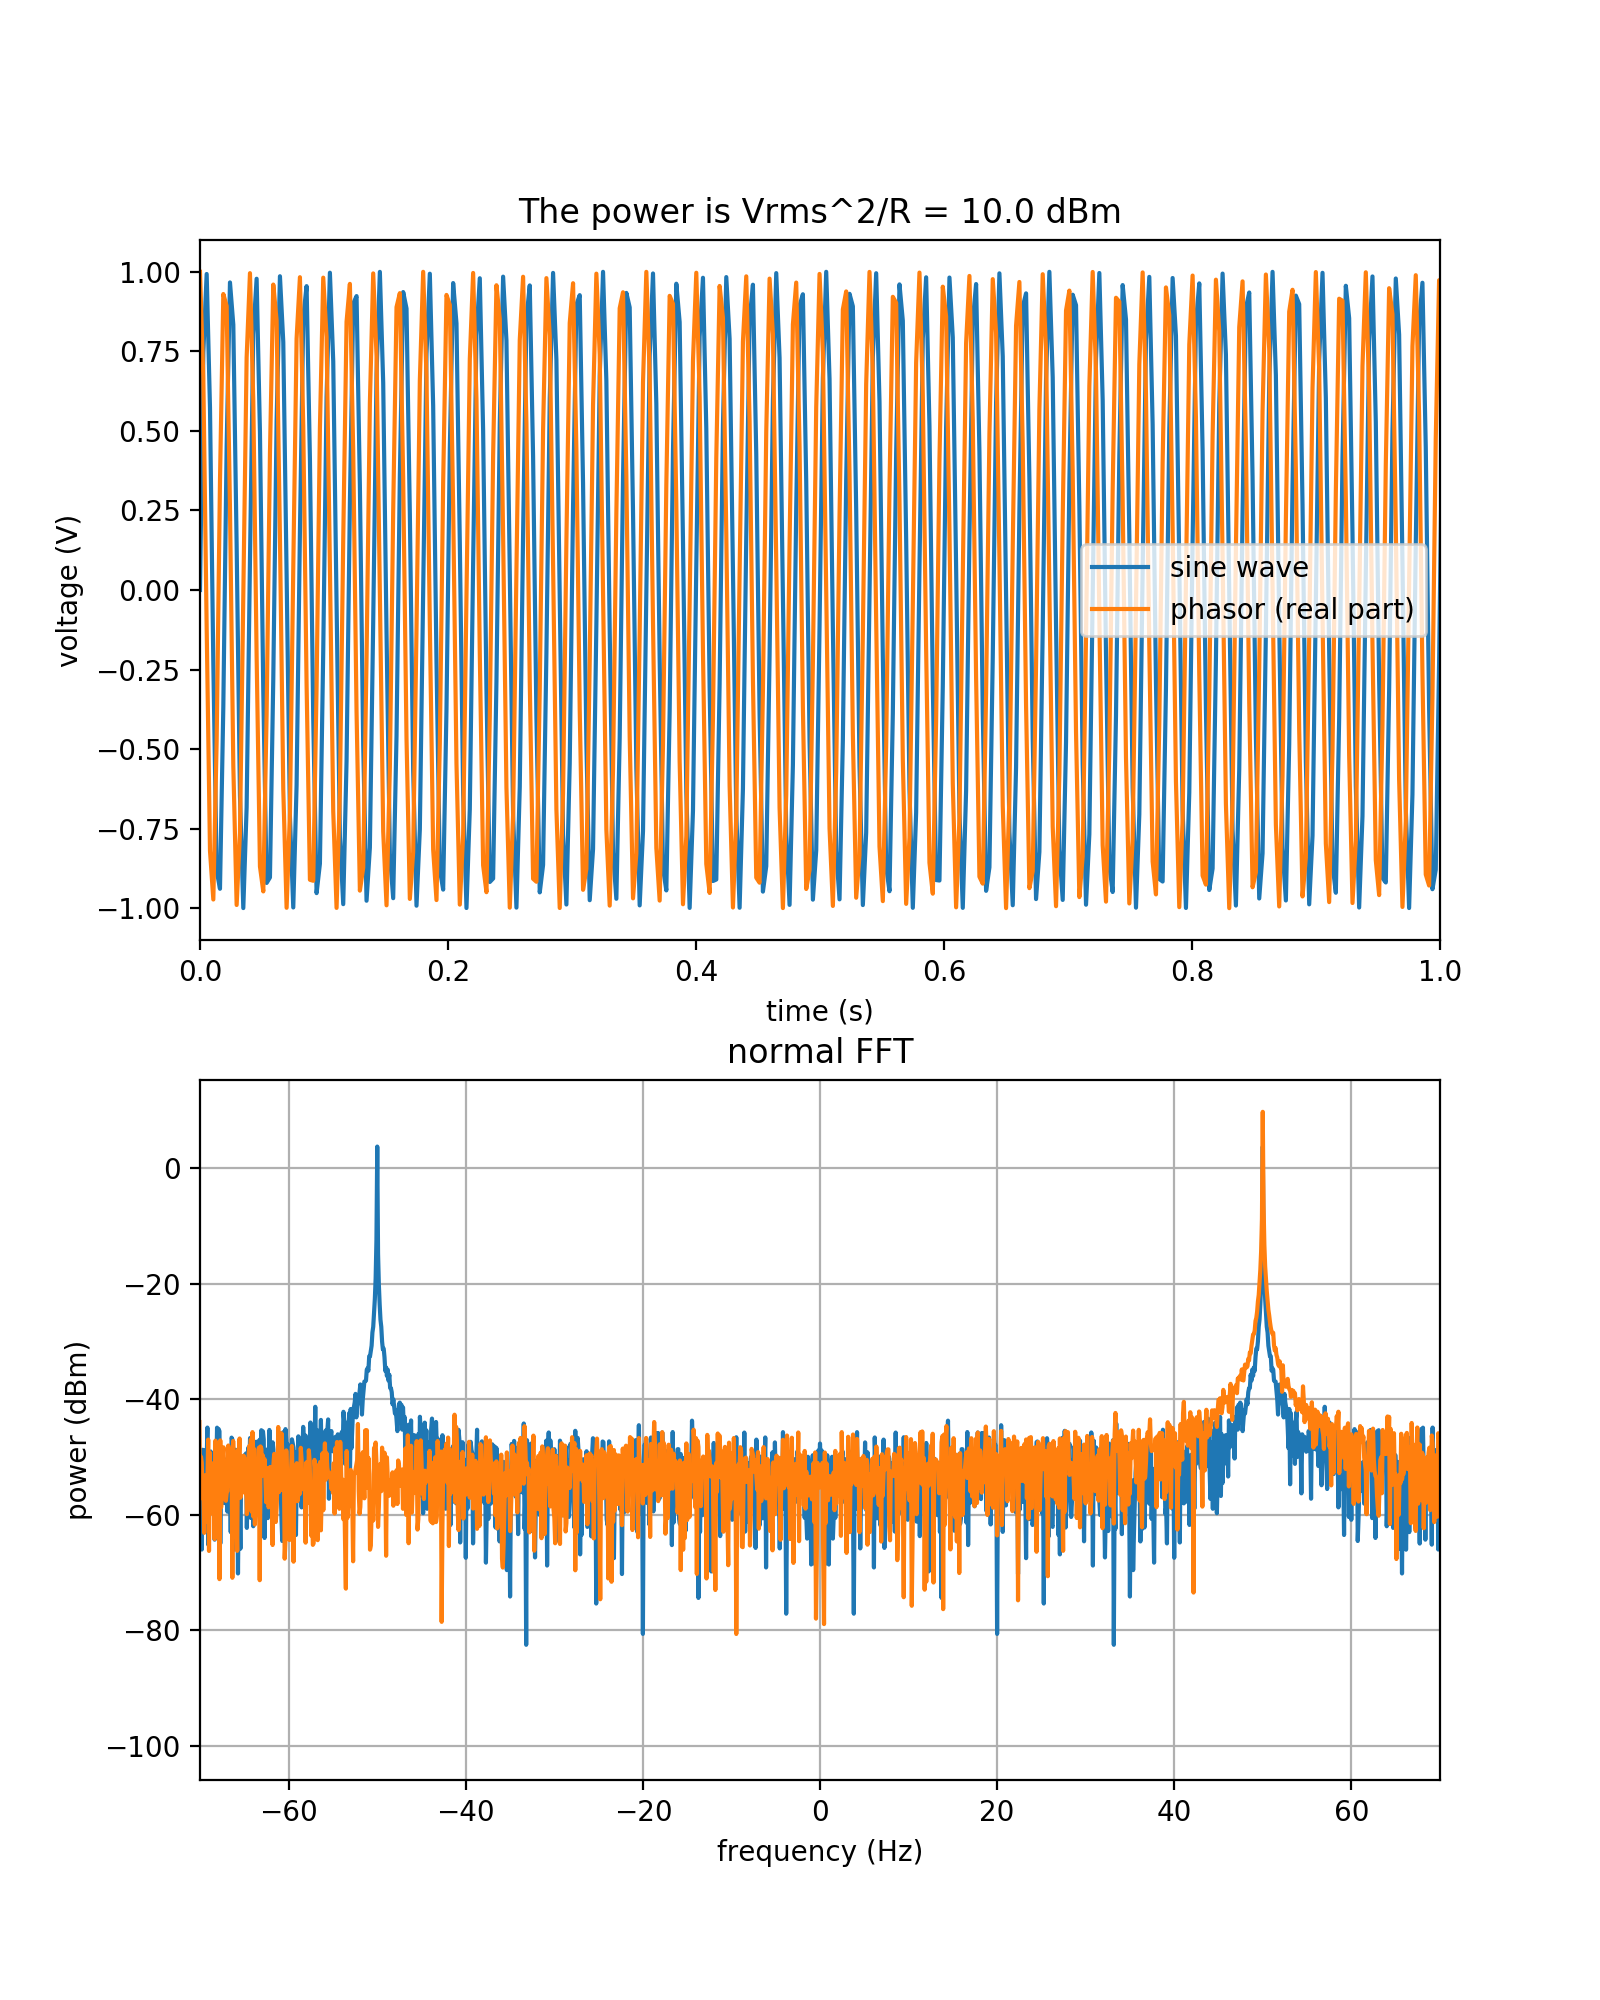

In [11]:
t1, y1 = wave(50,11, N=2**12)

freq1, s1, S1, PSD1 = FFT(t1, y1+noise(.05, len(y1)))

y2 = np.exp(2j * np.pi * 50 * t1)

freq2, s2, S2, PSD2 = FFT(t1, y2+noise(.05, len(y2)))

_, ax = plt.subplots(2, figsize=(8,10))
ax[0].set_title(f"The power is Vrms^2/R = {np.round(30+10*np.log10(Vrms**2/50),1)} dBm")
ax[0].plot(t1, y1, label = "sine wave")
ax[0].plot(t1, y2.real, label = "phasor (real part)")
ax[0].legend()
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("voltage (V)")
ax[0].set_xlim(0,1)

ax[1].plot(freq1, dBm(PSD1), label = "sine wave")
ax[1].plot(freq1, dBm(PSD2), label = "phasor")
ax[1].set_xlim(-70,70)
ax[1].set_xlabel("frequency (Hz)")
ax[1].set_ylabel("power (dBm)")
ax[1].set_title("normal FFT")
ax[1].grid()

### for the nerds...
Or, a third, super nerdy way to check normalization. Use [Parsevals theorem](https://en.wikipedia.org/wiki/Parseval%27s_theorem)

**Parseval's Theorem**:

The sum of the squares of the signal amplitudes == the sum of the squares of FT amplitudes.


In [12]:
# checking parseval's theorem.
t1, y1 = wave(50,11, N=2**12)
freq1, s1, S1, PSD1 = FFT(t1, y1)

print(f"The sum of the square of the signal are {np.round(1/2**12*np.sum(np.abs(y1)**2),2)}")
print(f"The sum of the square of the FFT amplitudes are {np.round(np.sum(S1),2)}")


The sum of the square of the signal are 0.5
The sum of the square of the FFT amplitudes are 0.5


<img src="files/thumbsup.gif">

# If you can't do FFT, then at least think FFT
Here are some useful properties of FFTs that everyone should have a handle on. I'll list them and show examples:
- The FT of a gaussian (bell curve) is a gaussian.
- The FT of a pulse that is short in the time domain is broad in the frequency domain.
- The FT of something long/broad in the time domain is narrow in the frequency domain.
- The FFT of a box is a sinc.
- The FFT of periodic signals with sharp features usually leads to harmonics.
- Sharp feature in the time/frequency domain lead to a lot of components in the frequency/time domain.
- You can generalize to more than one dimension. IE, take FFTs of images.  

<IPython.core.display.Javascript object>


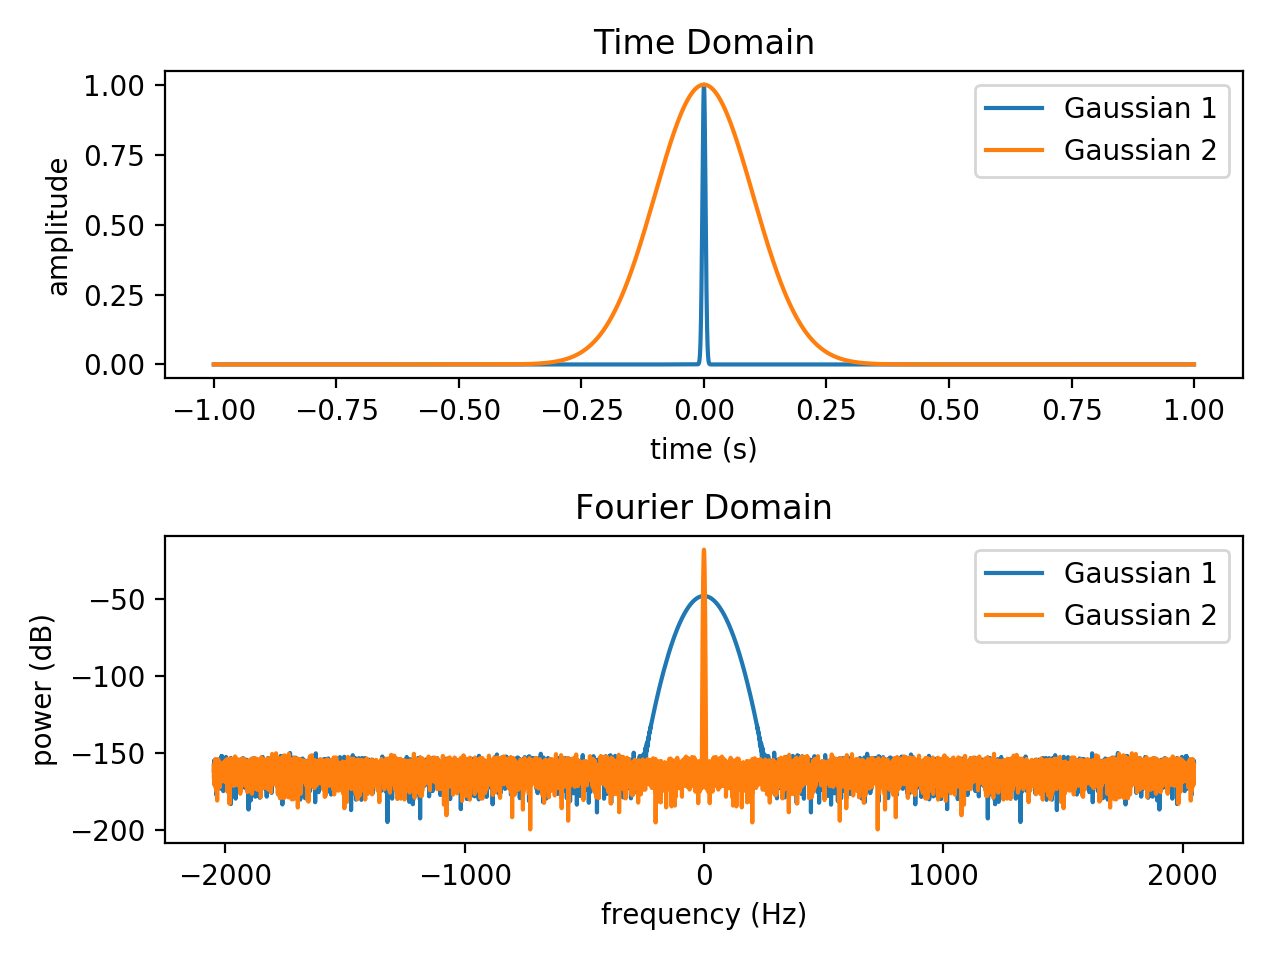

In [13]:
## Gaussians and pulses
N = 2 ** 12
t = np.arange(-1,1,1/N)
gaussian1 = np.exp(-t**2/.00002)+noise(1e-6,len(t))
gaussian2 = np.exp(-t**2/.02)+noise(1e-6,len(t))
f1,s1,S1,PSD1 = FFT(t,gaussian1)
f2,s2,S2,PSD2 = FFT(t,gaussian2)
_,ax = plt.subplots(2)
ax[0].plot(t, gaussian1, label = "Gaussian 1")
ax[0].plot(t, gaussian2, label = "Gaussian 2")
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("amplitude")
ax[0].set_title("Time Domain")
ax[0].legend()
ax[1].plot(f1, PSD1, label = "Gaussian 1")
ax[1].plot(f2, PSD2, label = "Gaussian 2")
ax[1].set_xlabel("frequency (Hz)")
ax[1].set_ylabel("power (dB)")
ax[1].set_title("Fourier Domain")
ax[1].legend()
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


<IPython.core.display.Javascript object>


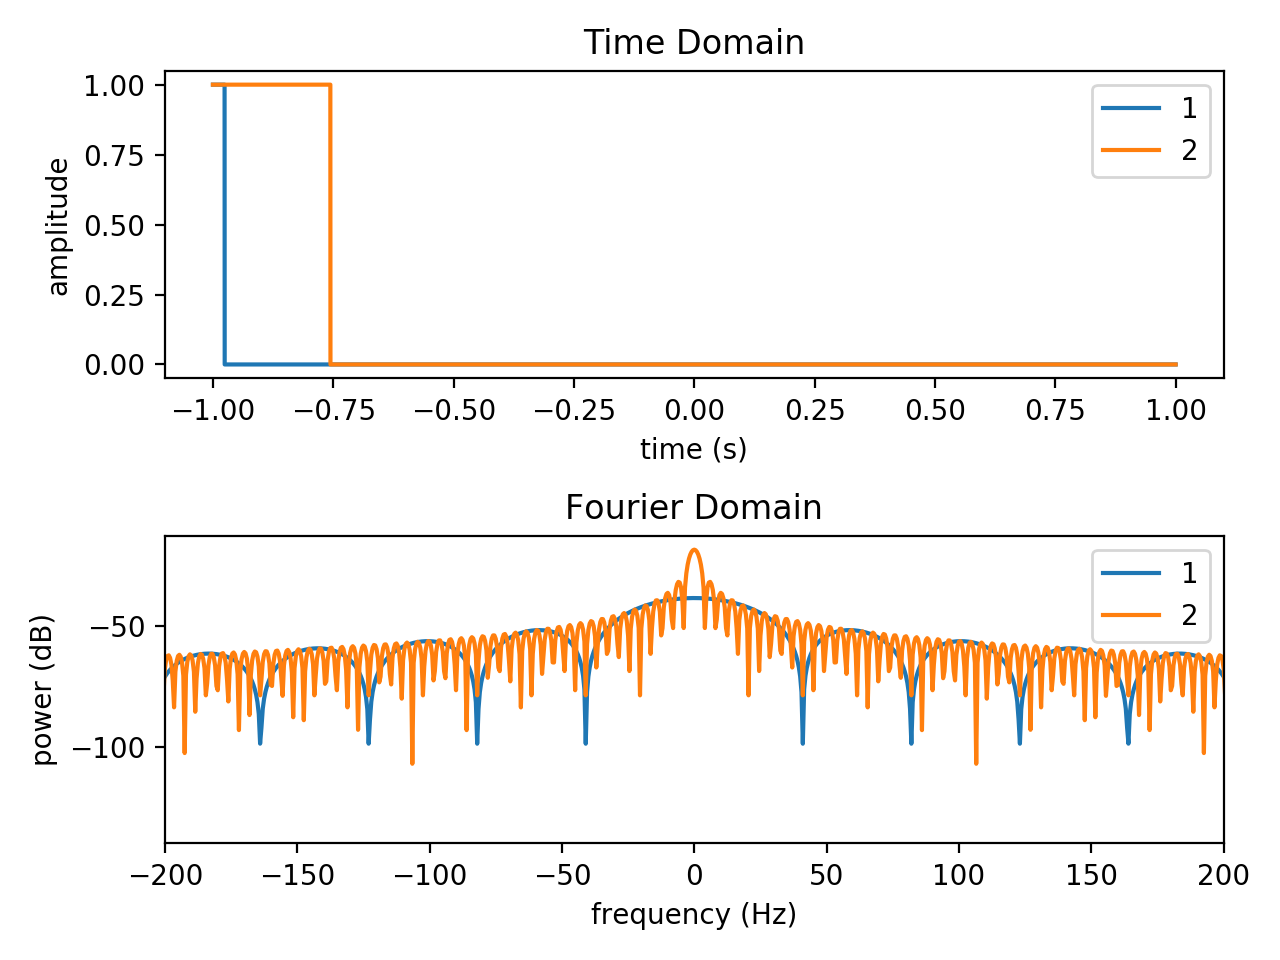

In [14]:
## squares
N = 2 ** 12
t = np.arange(-1,1,1/N)
g1 = np.zeros_like(t)
g1[0:100] = np.ones(100)

g2 = np.zeros_like(t)
g2[0:1000] = np.ones(1000)

f1,s1,S1,PSD1 = FFT(t,g1)
f2,s2,S2,PSD2 = FFT(t,g2)

_,ax = plt.subplots(2)
ax[0].plot(t, g1, label = "1")
ax[0].plot(t, g2, label = "2")
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("amplitude")
ax[0].set_title("Time Domain")
ax[0].legend()
ax[1].plot(f1, PSD1, label = "1")
ax[1].plot(f2, PSD2, label = "2")

ax[1].set_xlabel("frequency (Hz)")
ax[1].set_ylabel("power (dB)")
ax[1].set_title("Fourier Domain")
ax[1].legend()
ax[1].set_xlim(-200,200)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


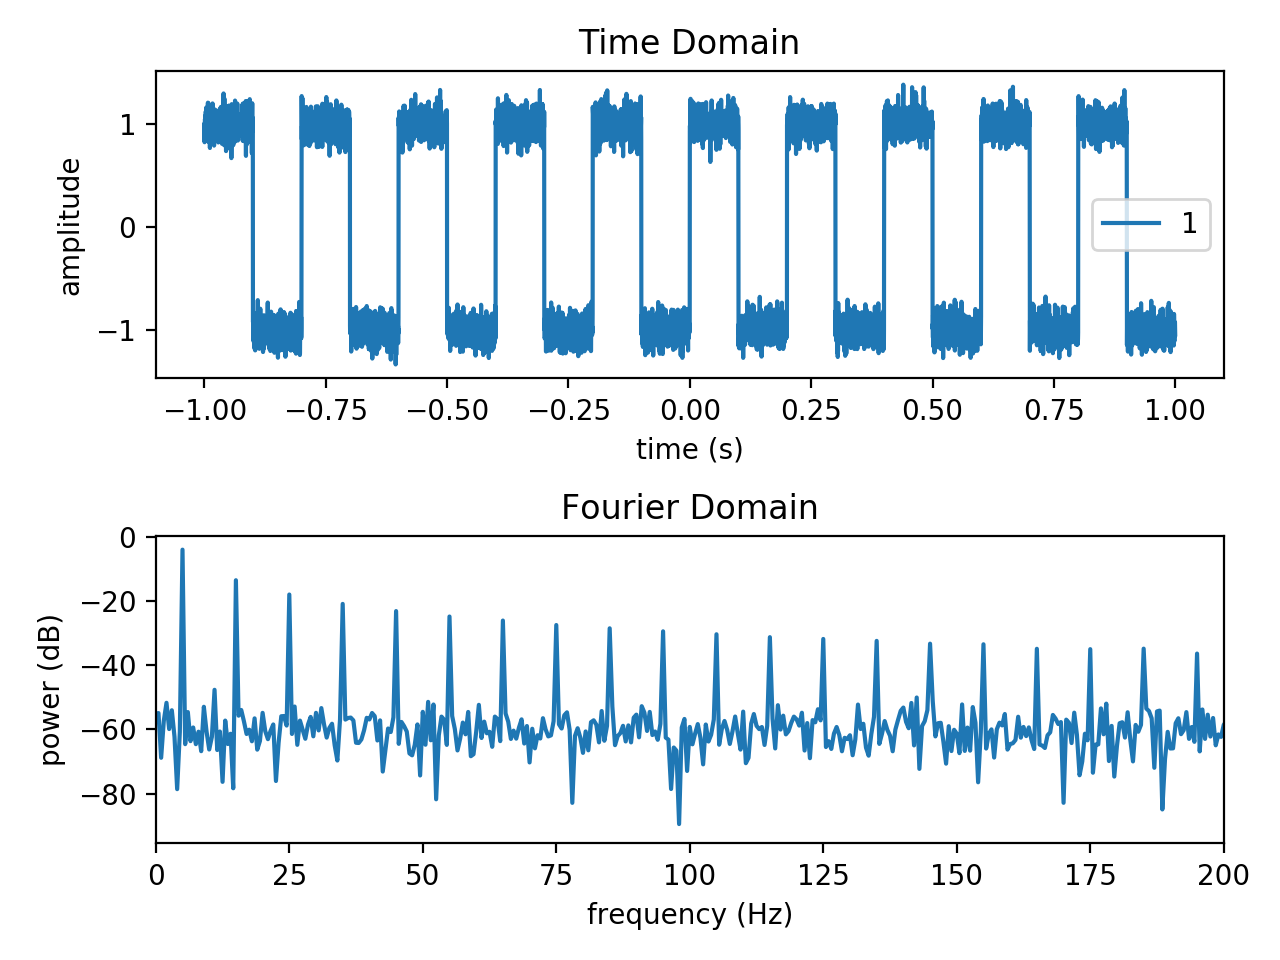

In [15]:
from scipy.signal import square
## square wave
N = 2 ** 12
t = np.arange(-1,1,1/N)
g1 = square(2*np.pi*5*t,.5) + noise(.1,len(t)) 
f1,s1,S1,PSD1 = FFT(t,g1)

_,ax = plt.subplots(2)
ax[0].plot(t, g1, label = "1")

ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("amplitude")
ax[0].set_title("Time Domain")
ax[0].legend()

ax[1].plot(f1, PSD1, label = "1")
ax[1].set_xlabel("frequency (Hz)")
ax[1].set_ylabel("power (dB)")
ax[1].set_title("Fourier Domain")
# ax[1].legend()
ax[1].set_xlim(0,200)
plt.tight_layout()
plt.show()

# What is zero padding and does it do anything?
Zero padding is nothing more than adding zeros to an array to increase the N of the FFT. This can accomplish one of two things. Most people zero pad so that N is a power of 2. This keeps the FFT most efficient. It can also reduce the RBW. Some people think this magically gets you better resolution on your signal, but that isn't true. If the signal is on for 1 sec, the RBW = 1 Hz. If you zero pad to 10 s, you don't magically get 0.1 Hz resolution on the signal. Mr. Fourier says that finest feature you can resolve on the signal is still 1 Hz because it was only "on" for 1 sec.  However, if you are doing something like peak finding, it can be helpful because it can make a more well behaved peak.

### Important

For this example, I used the built-in zero-padding feature of numpy's FFT. For proper normalization, make sure you divide the FFT of the original signal length and **not** the length of the padded signal. If you manually pad, normalization is on you.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


<IPython.core.display.Javascript object>


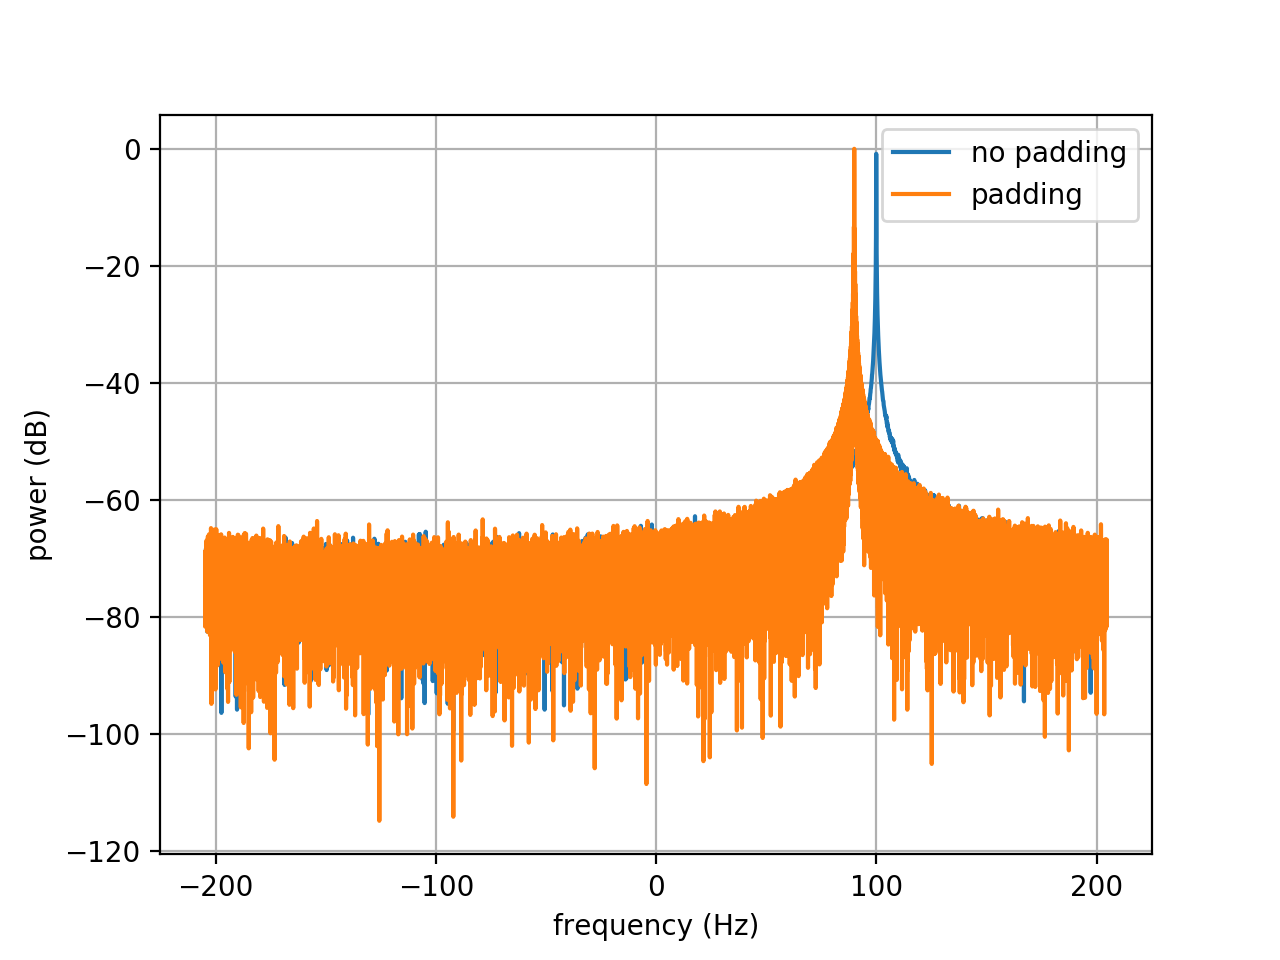

In [16]:
def wave_complex(f, tmax, N = 2**10):
    t = np.linspace(0,tmax,N)
    omega = 2 * np.pi * f
    return t, np.sin(omega * t) - 1j* np.cos(omega * t)


t, y = wave_complex(100,10, N=2**12)
t1, y1 = wave_complex(90,10, N=2**12)

f1,s1,S1,PSD1 = FFT(t, y+noise(.01, len(y)))
f2,s2,S2,PSD2 = FFT(t1, y1+noise(.01, len(y1)), N = 2**14)

plt.figure()
plt.plot(f1, PSD1, label = "no padding")
plt.plot(f2, PSD2, label = "padding")
plt.xlabel("frequency (Hz)")
plt.ylabel("power (dB)")
plt.legend()
plt.grid()
plt.show()


## What are all those garbage ripples in the zero-padded signal?

Those are an artifact of the signal abruptly turning off before the padded region. We can get rid of those by applying FFT windows. 

Windows are nice and useful. Some people are overly passionate about which one they like the best. If you are new to window shopping, start with a Hanning or Hamming.

Windows in general drop the overal signal amplitude, so beware. 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


<IPython.core.display.Javascript object>


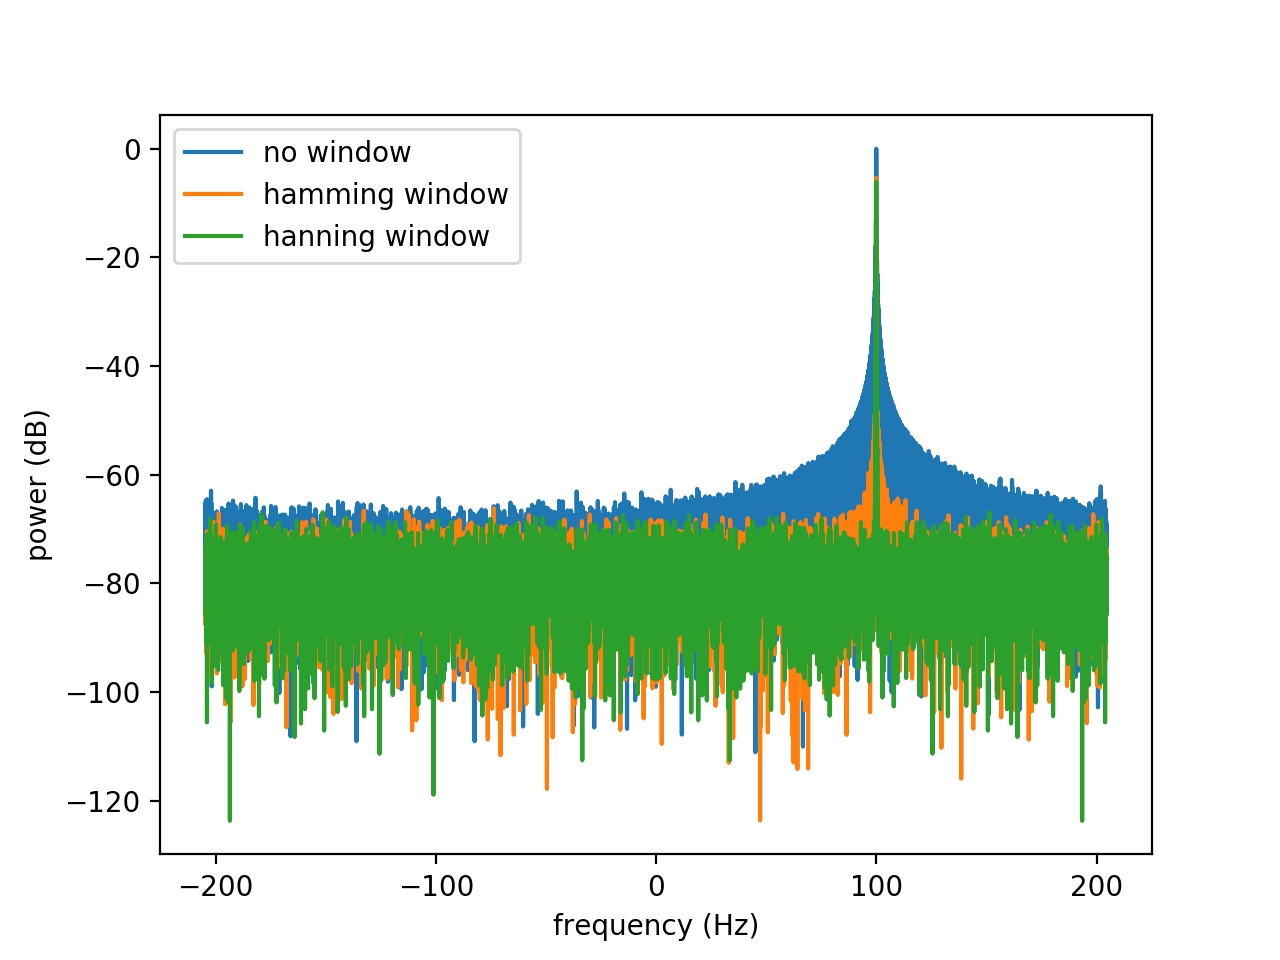

In [17]:
t, y = wave_complex(100,10, N=2**12)
t1, y1 = wave_complex(90,10, N=2**12)

f1,s1,S1,PSD1 = FFT(t, y+noise(.01, len(y)), N = 2**14)
f2,s2,S2,PSD2 = FFT(t, np.hamming(len(y)) * y+noise(.01, len(y)), N = 2**14)
f3,s3,S3,PSD3 = FFT(t, np.hanning(len(y)) * y+noise(.01, len(y)), N = 2**14)

plt.figure()
plt.plot(f1, PSD1, label = "no window")
plt.plot(f2, PSD2, label = "hamming window")
plt.plot(f3, PSD3, label = "hanning window")
plt.legend()
# plt.xlim(99,101)
plt.xlabel("frequency (Hz)")
plt.ylabel("power (dB)")
plt.show()

# Filtering via FFT
You can implement filters in the Fourier domain pretty easily. I'll show you a low pass filters. There are much more elegant ones that this of course. Scipy has some nice signal processing capabilities and you can check it out in the [scipy package](https://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html)


<IPython.core.display.Javascript object>


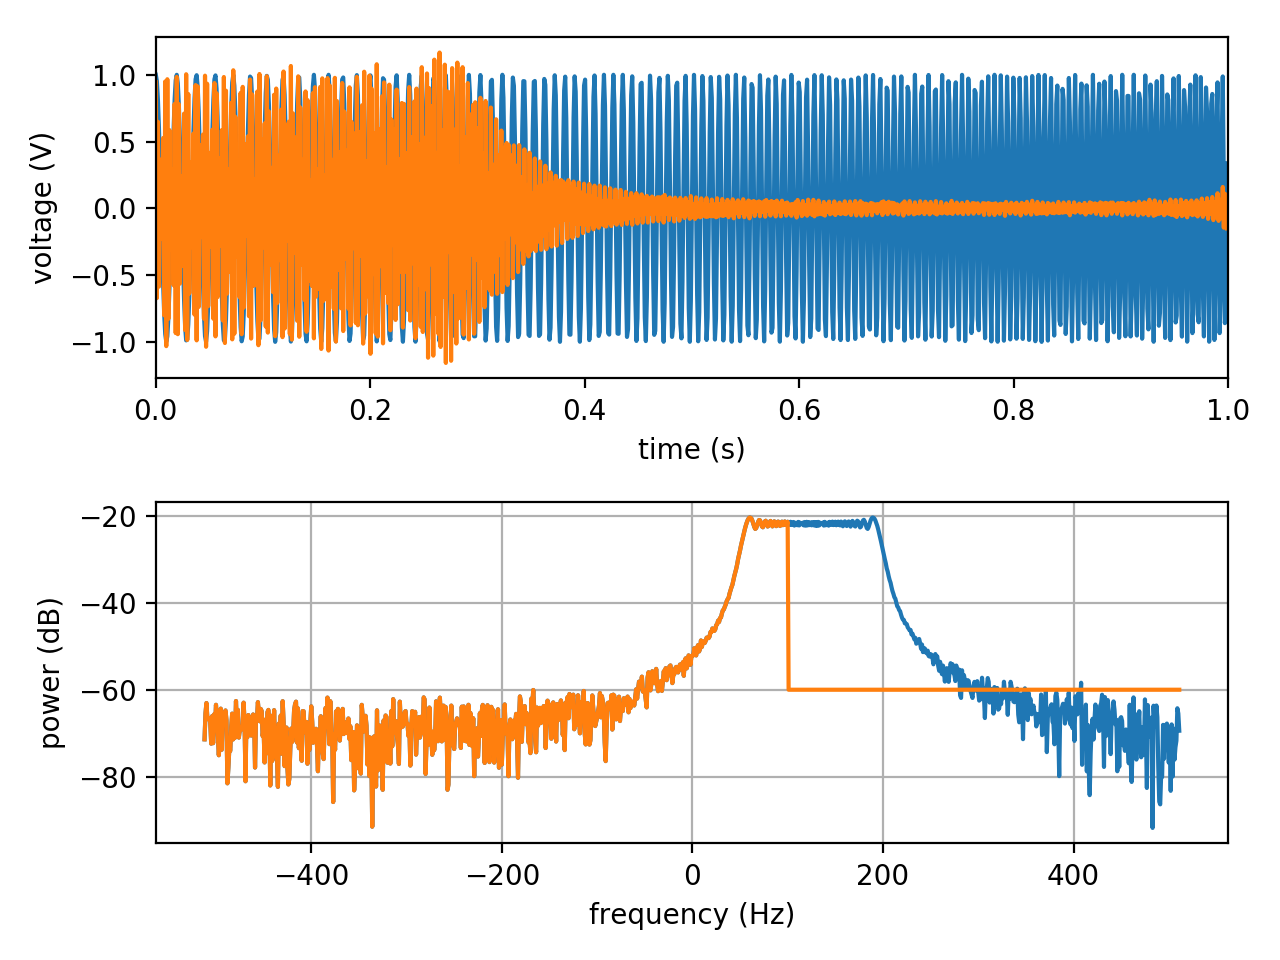

In [18]:
def chirp(f1,f2, N = 2**10):
    t = np.arange(0,1,1/N)
    omega = 2 * np.pi * (f1 + 0.5 * (f2 - f1) * t) 
    return t, np.exp(1j * omega * t)

t1, y1 = chirp(50,200)
f1,s1,S1,PSD1 = FFT(t1, y1+noise(.01, len(y1)))

locs = np.where(f1 > 100)[0]
s1[locs] = np.ones(len(locs)) * 1e-3
y1_inv = len(s1)*fft.ifft(s1)


## oritinal signals
_, ax = plt.subplots(2)
ax[0].plot(t1, y1.real, label = "before filter")
ax[0].plot(t1, y1_inv.real, label = "after filter")
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("voltage (V)")
ax[0].set_xlim(0,1)

ax[1].plot(f1, PSD1, label = "before filter")
ax[1].plot(f1, 10*np.log10(np.abs(s1)**2), label = "after filter")

ax[1].set_xlabel("frequency (Hz)")
ax[1].set_ylabel("power (dB)")

plt.grid()
plt.tight_layout()
plt.show()

## Phase matters
You can also extract the phase of a signal using the FFT. Some people call this a [Hilbert transform](https://en.wikipedia.org/wiki/Hilbert_transform). You are able to do this because the amplitudes that result from an FFT are in general complex. I'll show you an example for a chirp.

Also, be warned, just because two signals have the same power spectrum does not mean the time-domain is the same. I'll provide and example of this. It is important to remember that PSD isn't everything, nor is it complete information. 


<IPython.core.display.Javascript object>


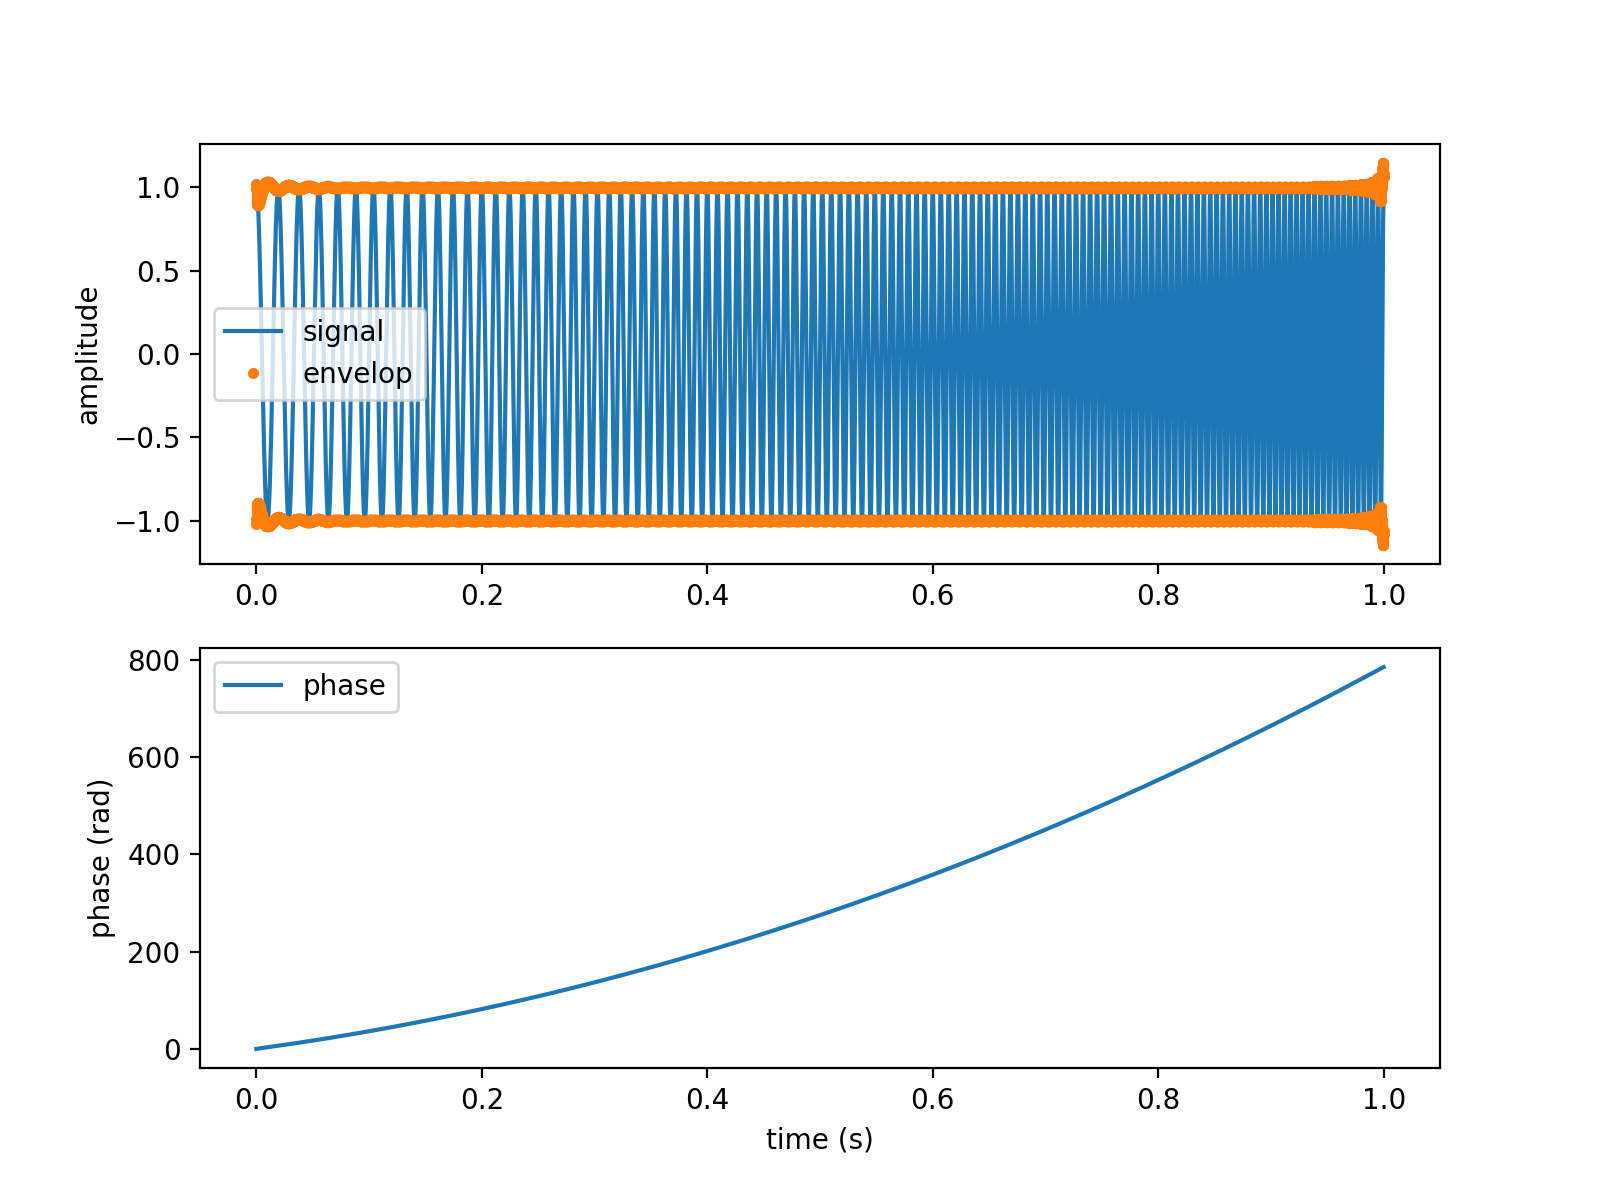

In [19]:
t1, y1 = chirp(50,200, N = 2 **14)

def analytic_signal(x):

    X = fft.fft(x,len(x))
    h = np.zeros(len(x))
    h[0] = 1
    h[1:len(x)//2] = np.ones(len(x)//2-1)
    h[len(x)//2] = 1
    Z = X*h
    z = fft.ifft(Z,len(x))
    return z

z = analytic_signal(y1)
env = np.abs(z)
phase = np.unwrap(np.angle(z))

_, ax = plt.subplots(2, figsize = (8,6))
ax[0].plot(t1, y1.real, label  = "signal")
ax[0].plot(np.concatenate((t1,t1)), np.concatenate((env,-env)),'.', label = "envelop")
ax[0].legend()
ax[0].set_ylabel("amplitude")
ax[1].plot(t1, phase, label = "phase")
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel("phase (rad)")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


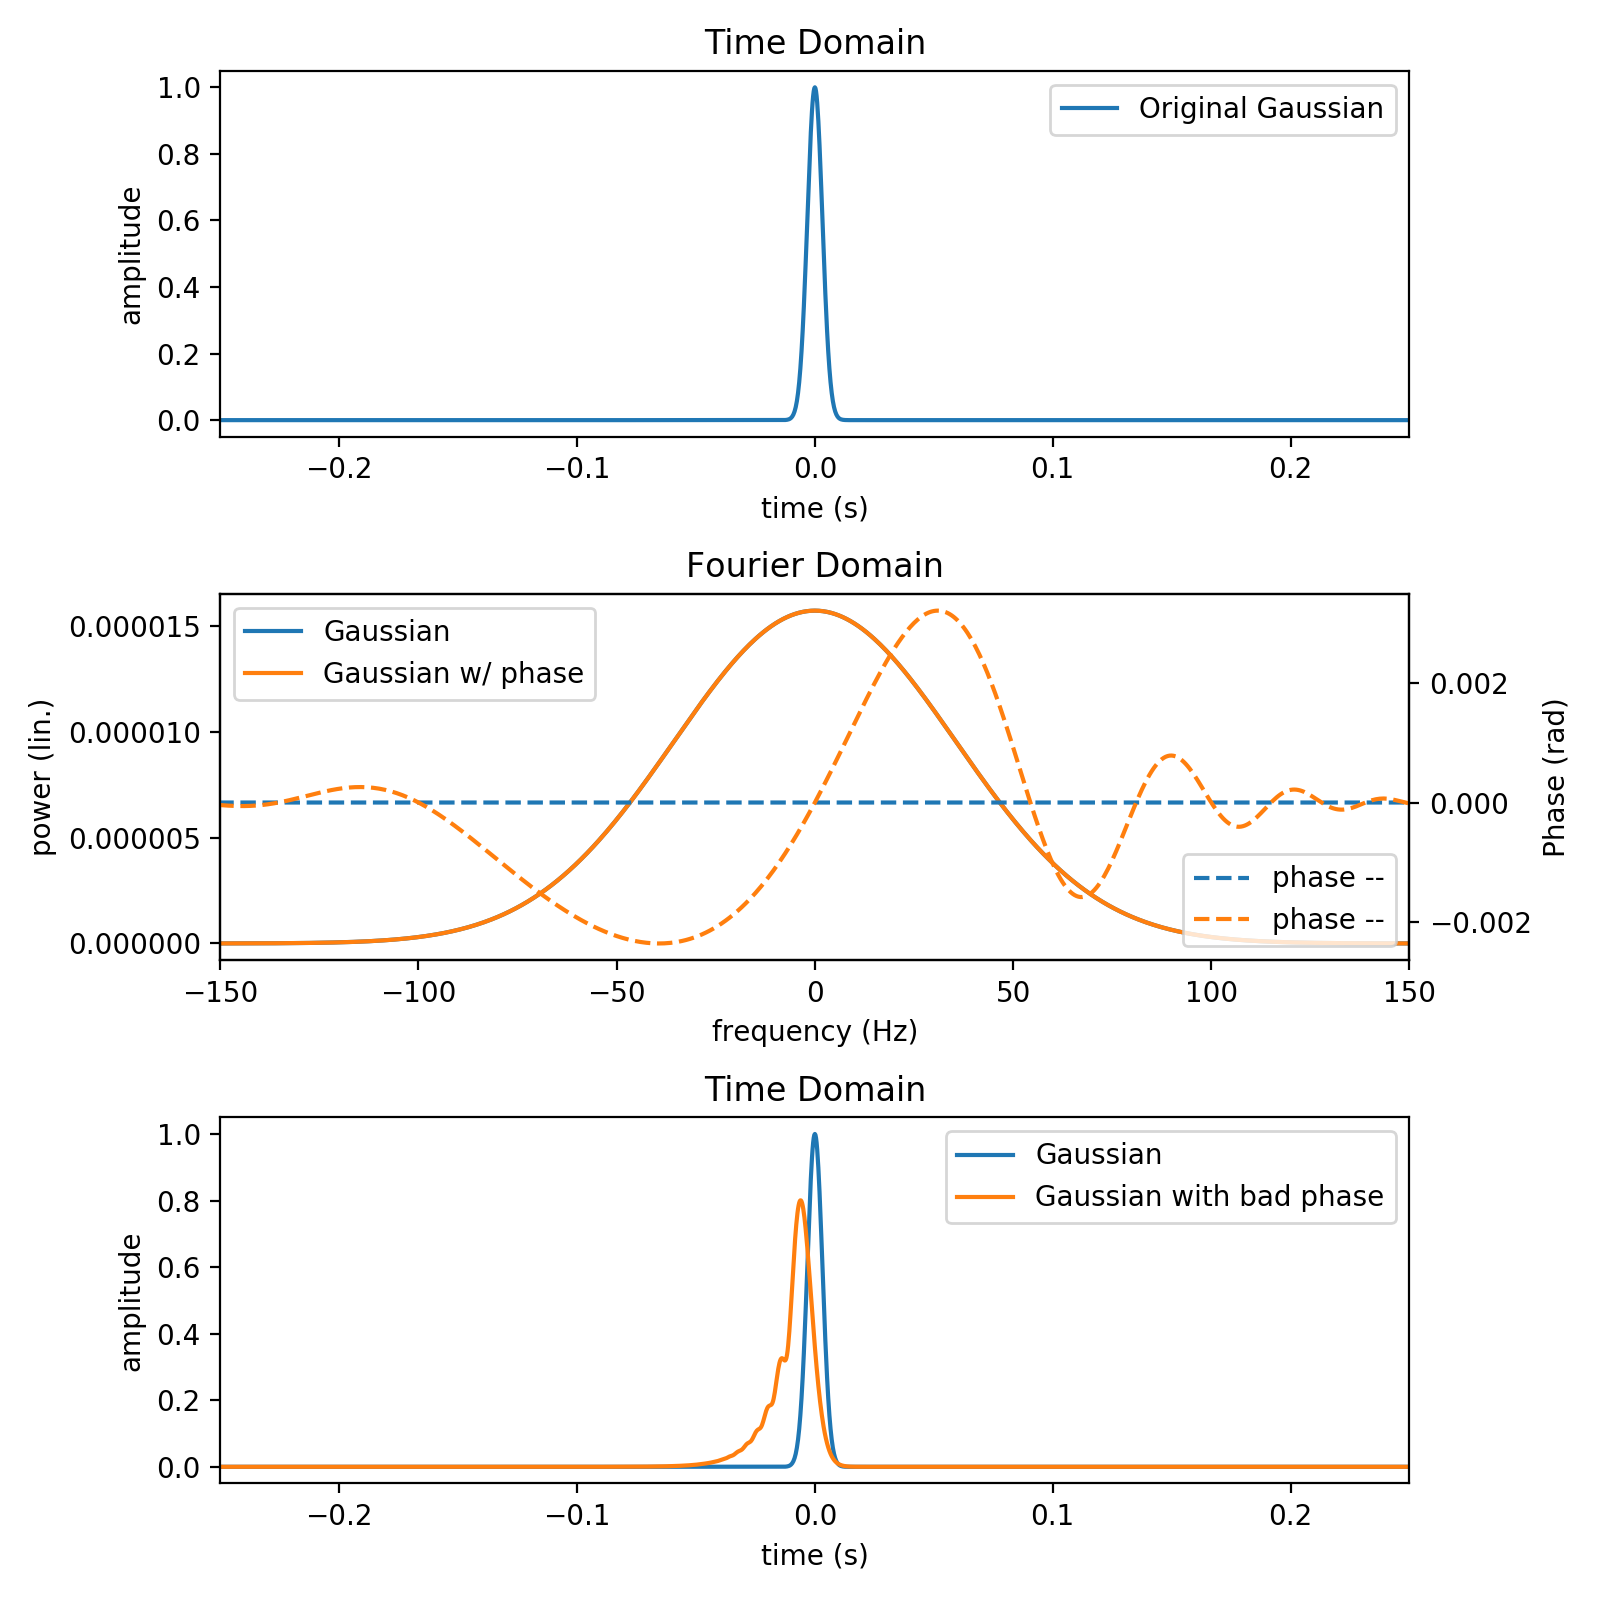

In [20]:
t = np.arange(-1,1,1/N)
gaussian1 = np.exp(-t**2/.00002)+noise(1e-6,len(t))
f1,s1,S1,PSD1 = FFT(t,gaussian1)
N = len(f1)

s2 = np.abs(s1)* np.exp(.01j * np.pi * f1 ** 1) * np.exp(.0001j * np.pi * f1 ** 2) * np.exp(.000001j * np.pi * f1 ** 3) 

_,ax = plt.subplots(3, figsize=(8,8))
ax[0].plot(t, gaussian1, label = "Original Gaussian")
ax[0].set_xlim(-.25,.25)
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("amplitude")
ax[0].set_title("Time Domain")
ax[0].legend()

ax[1].plot(f1, np.abs(s1)**2, label = "Gaussian")
ax[1].plot(f1, np.abs(s2)**2, label = "Gaussian w/ phase")
ax2 = ax[1].twinx()
ax2.plot(f1, s1.imag,'--', label = "phase --")
ax2.plot(f1, s2.imag,'--', label = "phase --")
ax2.legend(loc = "lower right")
ax2.set_ylabel("Phase (rad)")
ax[1].set_xlabel("frequency (Hz)")
ax[1].set_ylabel("power (lin.)")
ax[1].set_title("Fourier Domain")
ax[1].set_xlim(-150,150)
ax[1].legend(loc = "upper left")

ax[2].plot(t, gaussian1, label = "Gaussian")
ax[2].plot(t, np.abs(fft.fftshift(len(s2)*fft.ifft(s2))), label="Gaussian with bad phase")
ax[2].set_xlabel("time (s)")
ax[2].set_ylabel("amplitude")
ax[2].set_title("Time Domain")
ax[2].set_xlim(-.25,.25)
ax[2].legend()
plt.tight_layout()
plt.show()

# Digitizers and I/Q sampling
## what is I/Q smapling?
I'm sure you have all heard about block up converters and block down converters. Their key feature is that they are able to "multiply" two (or any) frequencies together and get the resulting sum and difference. This works because of basic trigonometry and [trigonometric identities](https://en.wikipedia.org/wiki/List_of_trigonometric_identities).

Fist let's take $sin(\omega_1 t + \phi_1) \times sin(\omega_2 t + \phi_2)$. From this you get:

&nbsp;&nbsp;&nbsp;&nbsp; $sin(\omega_1 t + \phi_1) \times sin(\omega_2 t + \phi_2) = \frac{1}{2}\left[ cos\left((\omega_1 - \omega_2) t + \phi_1-\phi_2\right)  - cos((\omega_1 + \omega_2) t + \phi_1+\phi_2)\right]$

If you inspect this, you will see that the difference term downconverts, the sum term up converts. If we just  consider downconversion first, the we see something problematic. Assuming we have the two frequencies to be the same, but $\phi_1 = 0$ and $\phi_2 = \pi/2$, we see that this downconverted signal disappears! That's no good, because there actually is a signal there. So, downconverters with this sort or single mixing stage will actually miss things. The way around this is to perform the mixing stage twice. Once with a signal as $LO_1 = \omega_2 t + \phi_2$ and another at  $LO_2 = \omega_2 t + \phi_2 + \pi/2$. This ensures that in either of these two channels the signal will always be present. Further it actually ensurs that you can reconstruct the full amplitude and phase of the signal that came in relative to your reference. If we label the signal from $LO_1$ as $I$ and the signal from $LO_2$ as $Q$, we can combine them as:

&nbsp;&nbsp;&nbsp;&nbsp;$ x(t) = I + j Q$

And, you can rewrite this as:

&nbsp;&nbsp;&nbsp;&nbsp;$x(t) = I + j Q = r e^{i\phi}$,

with:

&nbsp;&nbsp;&nbsp;&nbsp; $r = \sqrt{I^2 + Q^2}$

&nbsp;&nbsp;&nbsp;&nbsp; $\phi  = arg(x)$

## Does I/Q digitizing doubler your bandwidth?
Sort of. Remember, real signals are frequency symmetric (negative frequencies are identical to positive frequencies. So, for only a signal step downconversion (using on the I channel), you can't tell if the signal is above or below the frequency of the LO. So, in effect, this limits to you to only to positive frequencies in the Fourier domain. But, if we can determine the full complex signal, we can tell if the frequency is above or below the LO. This let's us use both positive and negative frequency components in the Fourier domain. 

But, in order to be able to use both positive and negative frequencies, you have to digitize two channels (both IQ). The Nyquist limit of resolvable bandwidth is not violated since we doubled the bandwidth by doubling the amount of digitization. So, there is no free lunch there. 


## What are ENOBs and what does it have to do with FFTs?
At some point, you should read [Understand SINAD, ENOB, SNR, THD, THD + N, and SFDR so
You Don't Get Lost in the Noise Floor](https://www.analog.com/media/en/training-seminars/tutorials/MT-003.pdf)

I think the most useful way to think about this is as follows:
- a N-bit digitizer will try to put the vertical scale in N different levels. 
- Due to noise sources, there will be some voltage fluctuations that there will obfuscate the last few bits effectively reducing the resolution. On top of that, there may be spurious signals present.
- This is ultimately reduced to a number called Signal-To-Noise-And-Distortion (SINAD) which can also be converted to effective-number-of-bits (ENOB)

This means, when simulating or analyzing a digitizer, it is incorrect to calculate the voltage noise floors by simply considering 2$^{ENOB}$. Rather, you should take ENOB (or SINAD) and calculate the noise for that. From there, you can simulate the digitizer by adding white noise on top of a quantization of 2$^{BITS}$ ** not ** 2$^{ENOB}$.


In [21]:
fsc = 250e6
ENOB = 10
BITS = 16
VMax = 1.25

# derived parameters
SINAD = 6.02 * ENOB + 1.76
P0 = 10 * np.log10((VMax /np.sqrt(2)) ** 2 *1e3 / 50) # maximum signal
NF = P0 - SINAD - 13 # noise floor
ADC_STD = 10 ** (NF / 20) / (2*np.sqrt(2)) 
print('Vrms of ADC: ' + str(np.round(ADC_STD*1e3, 2)) + ' mVrms')

# signal parameters
f = 15e6
t = np.arange(250e2)*1/fsc
x = VMax * np.cos(2 * np.pi * f * t) + VMax *1e-3 * (np.cos(2*np.pi*(f*2)*t) +  np.cos(2*np.pi*(5.7*f)*t)+ np.cos(2*np.pi*(3*f)*t) )

Vrms of ADC: 0.25 mVrms


In [22]:
# Apply ADC
# Add noise
x += np.random.normal(0, ADC_STD, len(x))

# Add vertical quantization
b = 2 * VMax / 2 ** BITS
x = np.array([i//b * b for i in x])

f1,s1,S1,PSD1 = FFT(t,x)

<IPython.core.display.Javascript object>


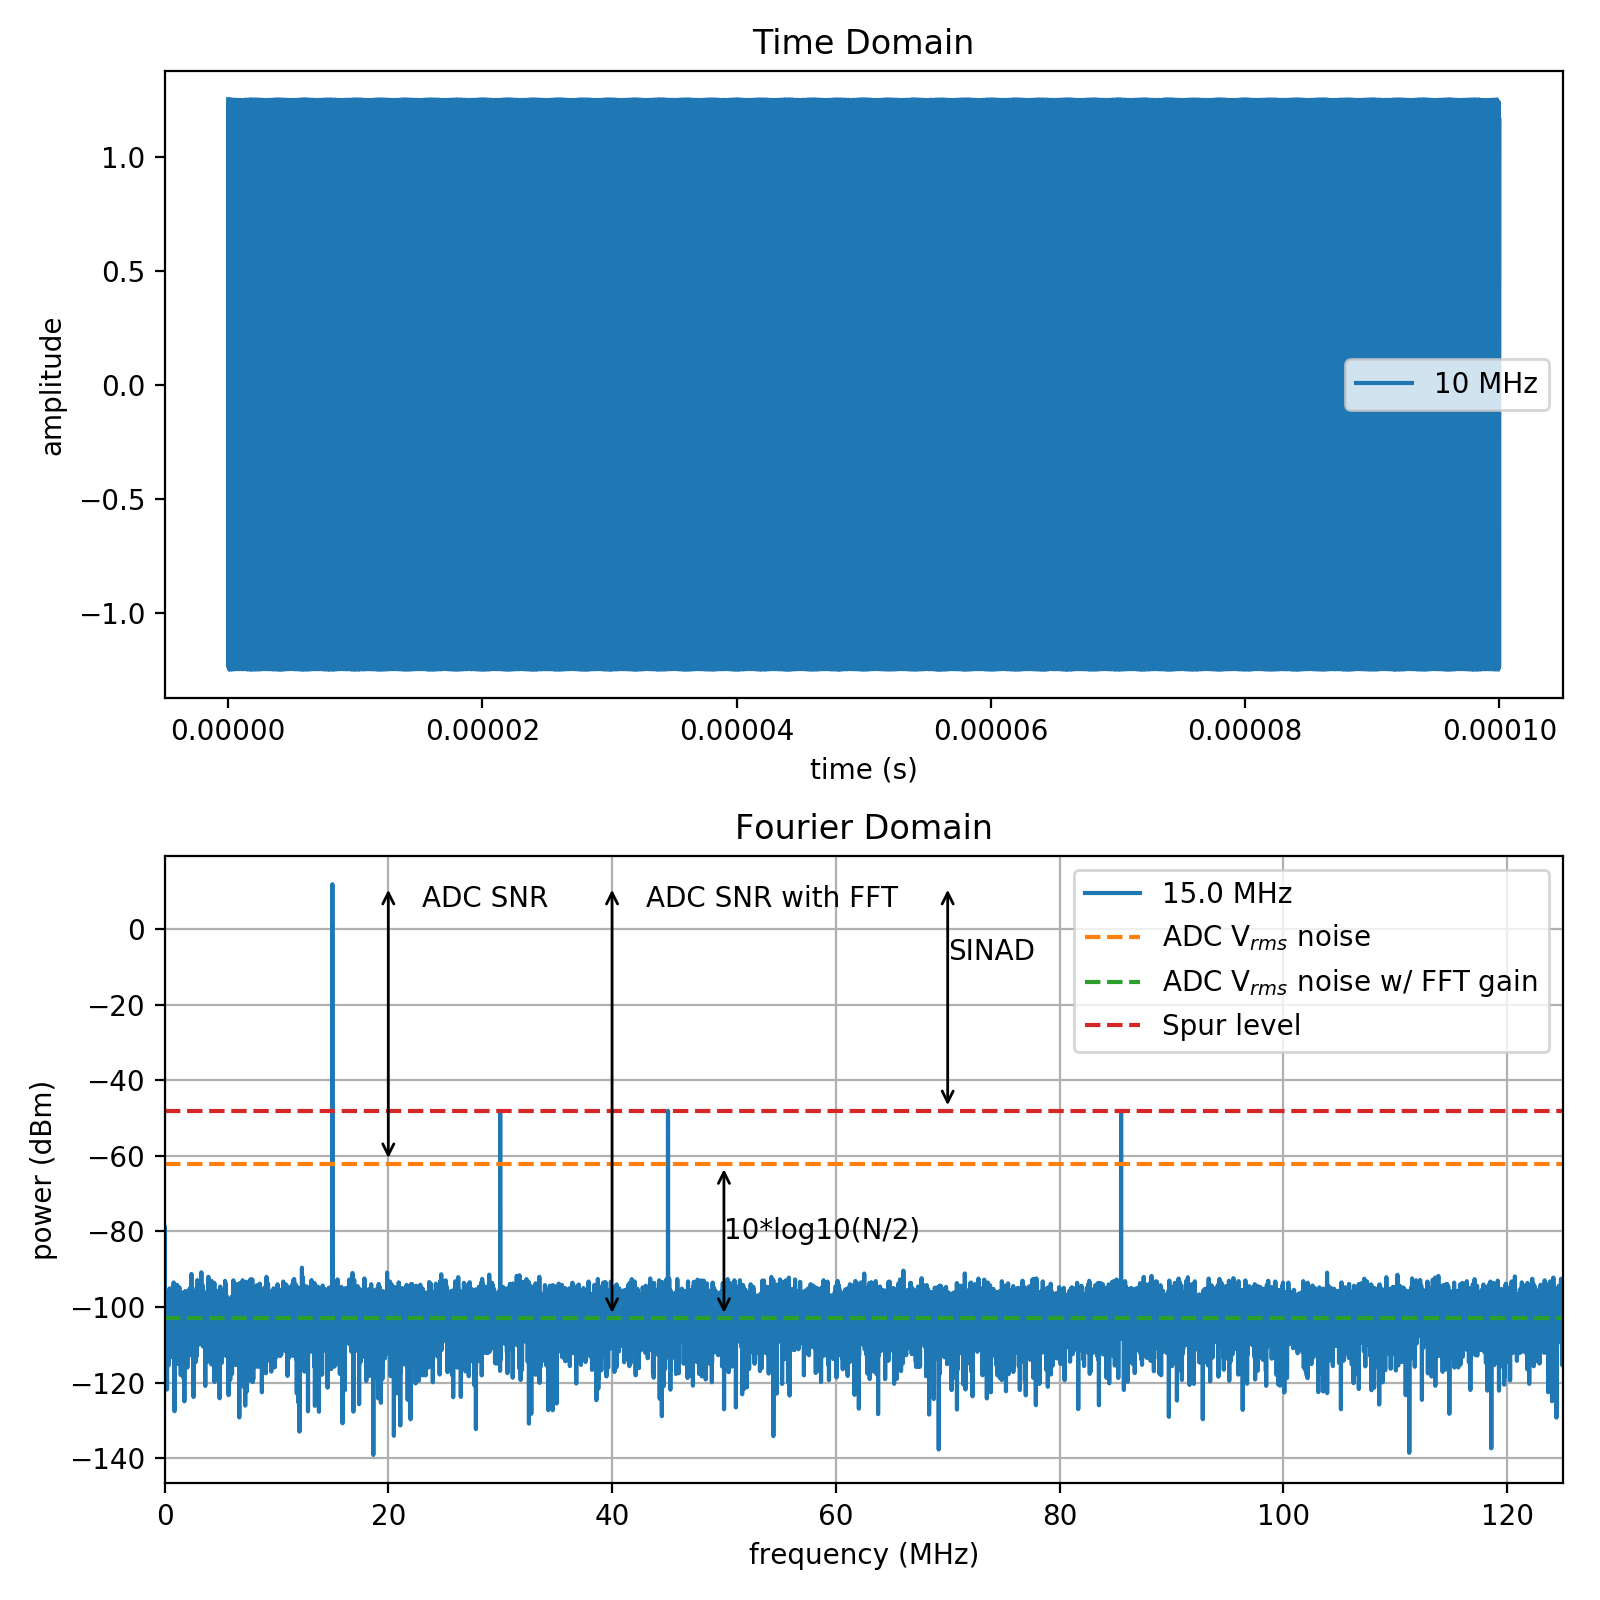

In [23]:
_,ax = plt.subplots(2, figsize=(8,8))
ax[0].plot(t, x.real, label = "10 MHz")
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("amplitude")
ax[0].set_title("Time Domain")
ax[0].legend()

ax[1].plot(f1/1e6, 6 + dBm(PSD1), label = f"{f//1e6} MHz")
adc_noise = 10+20*np.log10(ADC_STD)
# SNR ADC
ax[1].plot([0,125],[adc_noise, adc_noise], 
           '--', label= "ADC V$_{rms}$ noise" )
#FFT GAIN
adc_noise_with_gain = 10+20*np.log10(ADC_STD) - 10*np.log10(len(t)//2)
ax[1].plot([0,125],[adc_noise_with_gain,adc_noise_with_gain], 
           '--', label= "ADC V$_{rms}$ noise w/ FFT gain" )
#SINAD
spur_level = 10+20*np.log10(VMax *1e-3)
ax[1].plot([0,125],[spur_level,spur_level], 
           '--', label= "Spur level" )
# PEAK
ax[1].annotate("", xy=(20, adc_noise), xytext=(20, max(6 + dBm(PSD1))), arrowprops=dict(arrowstyle="<->"))
ax[1].annotate("ADC SNR", xy=(23, adc_noise),xytext=(23, max(dBm(PSD1))))
# SNR ADC
ax[1].annotate("", xy=(40, adc_noise_with_gain), xytext=(40, max(6 + dBm(PSD1))), arrowprops=dict(arrowstyle="<->"))
ax[1].annotate("ADC SNR with FFT", xy=(43, adc_noise_with_gain),xytext=(43, max(dBm(PSD1))))
#FFT GAIN
ax[1].annotate("", xy=(50, adc_noise), xytext=(50,adc_noise_with_gain), arrowprops=dict(arrowstyle="<->"))
ax[1].annotate("10*log10(N/2)", xytext=(50, adc_noise-20),xy=(50,adc_noise_with_gain-20))
#SINAD
ax[1].annotate("", xy=(70, max(6 + dBm(PSD1))), xytext=(70,spur_level), arrowprops=dict(arrowstyle="<->"))
ax[1].annotate("SINAD", xytext=(70, max(6 + dBm(PSD1))-20),xy=(70,spur_level-20))

ax[1].set_xlabel("frequency (MHz)")
ax[1].set_ylabel("power (dBm)")
ax[1].set_title("Fourier Domain")
ax[1].legend(loc = "upper right")
ax[1].set_xlim(0,125)
plt.tight_layout()
ax[1].grid()
plt.show()

# FFT of two delayed signals
Now that we have covered som basics, one import feature to consider is what happens to Fourier transforms of repeating signals. To show this, we will consider two identical pulses separated in time. Why? Because this is why and how TDoA approaches work. 

<IPython.core.display.Javascript object>


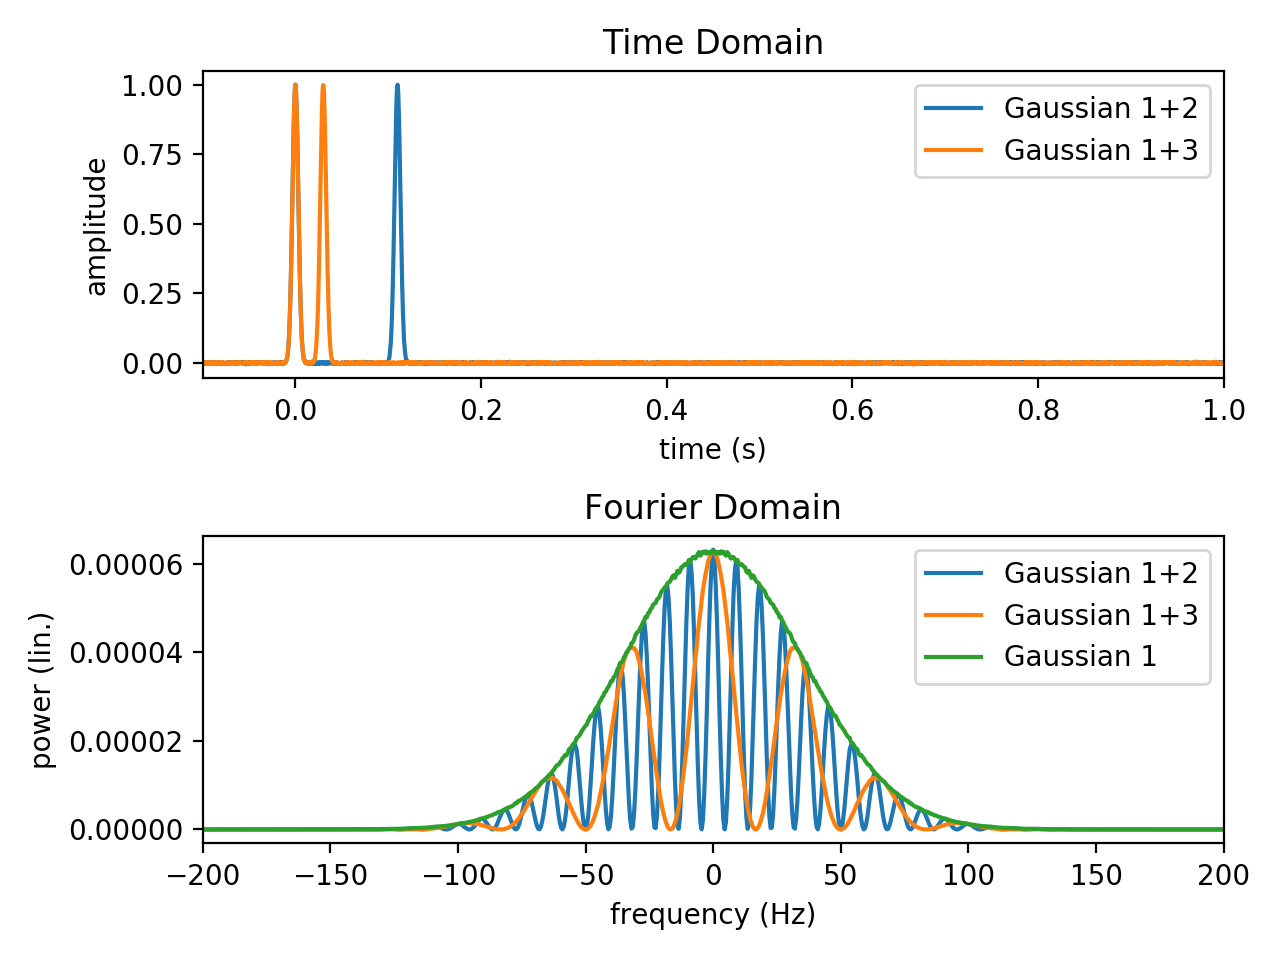

In [24]:
## Gaussians and pulses
N = 2 ** 12
t = np.arange(-1,1,1/N)
gaussian1 = np.exp(-t**2/.00002)+noise(1e-3,len(t))
gaussian2 = np.exp(-(t-.11) **2/.00002)+noise(1e-3,len(t))
gaussian3 = np.exp(-(t-.03) **2/.00002)+noise(1e-3,len(t))
f0,s0,S0,PSD0 = FFT(t,gaussian1)
f1,s1,S1,PSD1 = FFT(t,gaussian1+gaussian2)
f2,s2,S2,PSD2 = FFT(t,gaussian1+gaussian3)

_,ax = plt.subplots(2)
ax[0].plot(t, gaussian1+gaussian2, label = "Gaussian 1+2")
ax[0].plot(t, gaussian1+gaussian3, label = "Gaussian 1+3")
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("amplitude")
ax[0].set_title("Time Domain")
ax[0].set_xlim(-.1,1)
ax[0].legend()

ax[1].plot(f1, S1, label = "Gaussian 1+2")
ax[1].plot(f2, S2, label = "Gaussian 1+3")
ax[1].plot(f0, S0*4, label = "Gaussian 1")
ax[1].set_xlabel("frequency (Hz)")
ax[1].set_ylabel("power (lin.)")
ax[1].set_title("Fourier Domain")
ax[1].legend()
ax[1].set_xlim(-200,200)
plt.tight_layout()
plt.show()